In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pickle

ALL_FILES = [
    # "2950_spike_mat_or_rand", #26
    # "2953_spike_mat_or_rand", #Tal paper
    # "2957_spike_mat_or_rand",
    # "5116_spike_mat_or_rand",
    "M1S1_t_spk_mat_sorted",
    "M1S2_t_spk_mat_sorted",
    "M2S1_t_spk_mat_sorted",
    "M2S2_t_spk_mat_sorted",
    "M3S1_t_spk_mat_sorted",
    "M3S2_t_spk_mat_sorted",
    "O5_t_spk_mat_sorted",
    "O6_t_spk_mat_sorted",
]

Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'infomap', 'bayanpy', 'graph_tool', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}
[[5.21400242e-03 2.65790611e-03 3.36269691e-04]
 [2.65790611e-03 1.79929034e-03 5.71069701e-05]
 [3.36269691e-04 5.71069701e-05 1.00048691e-04]]


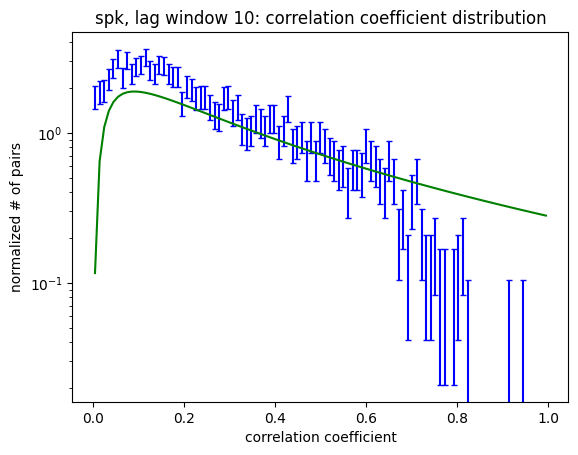

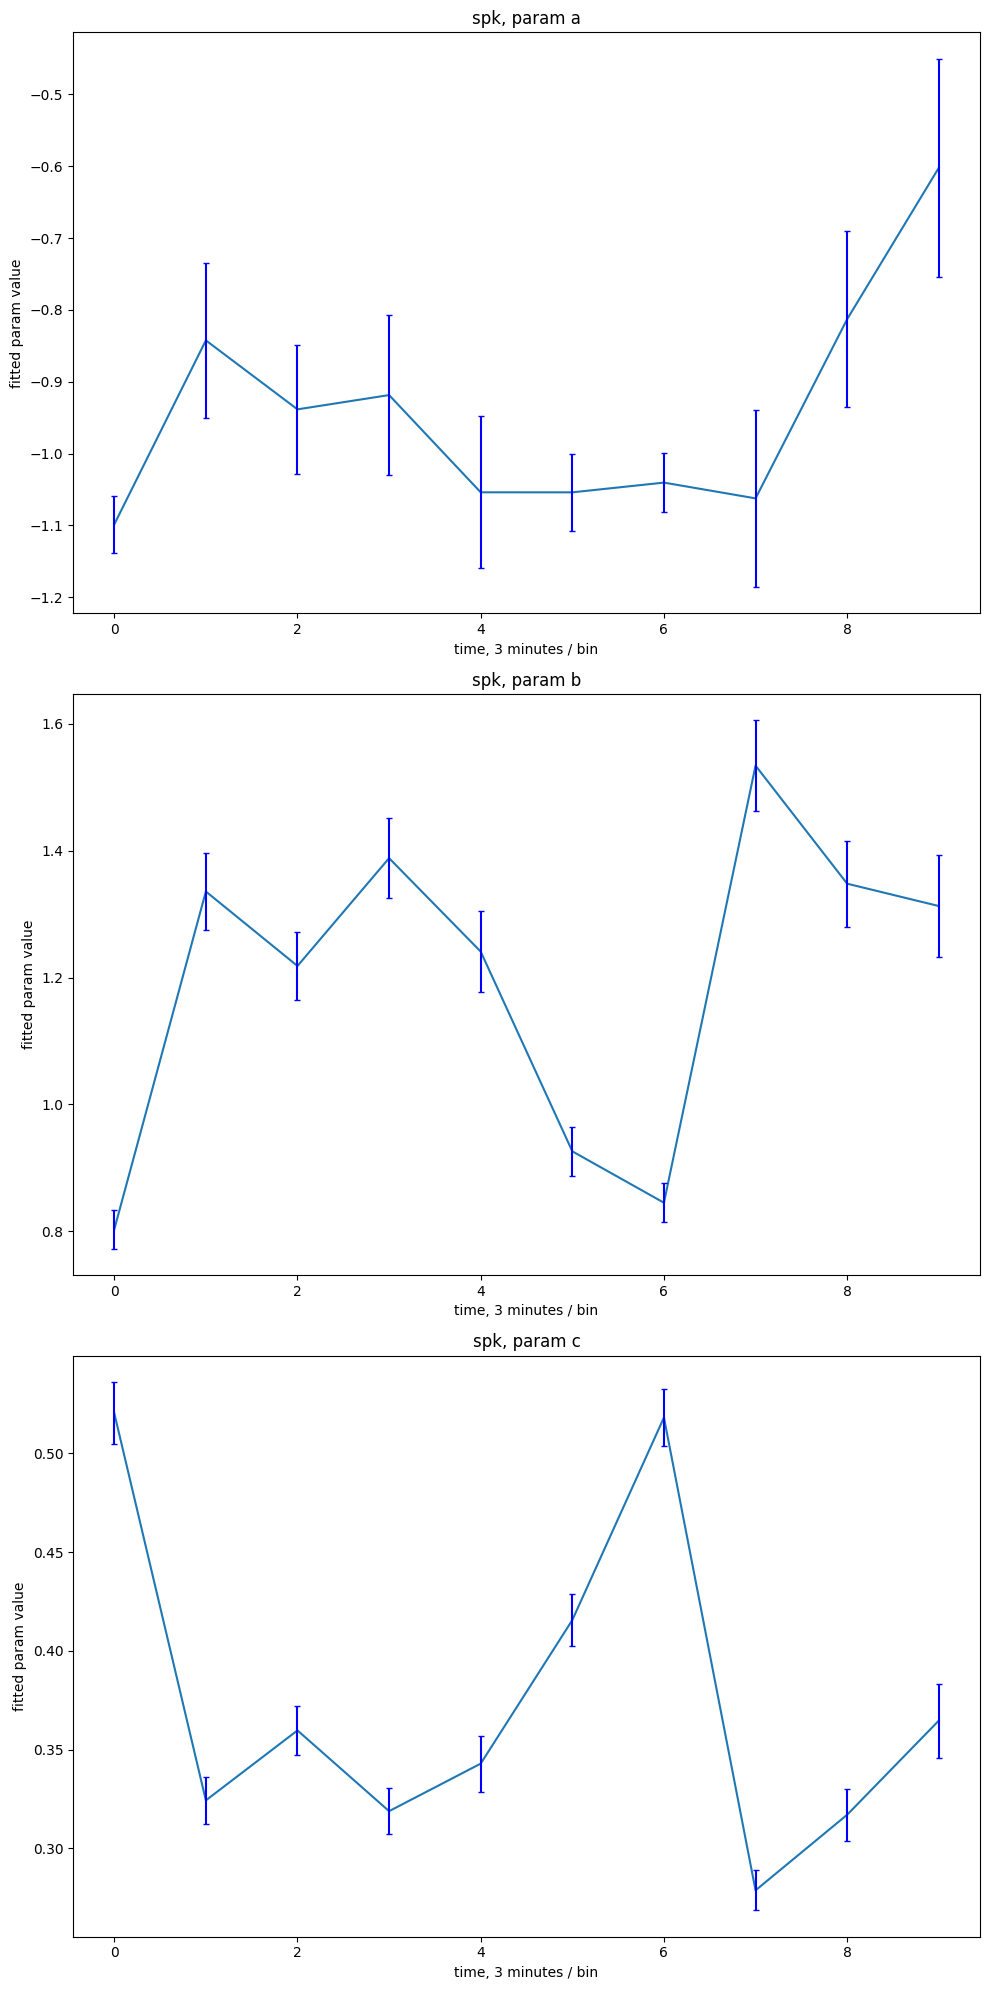

0.99434376


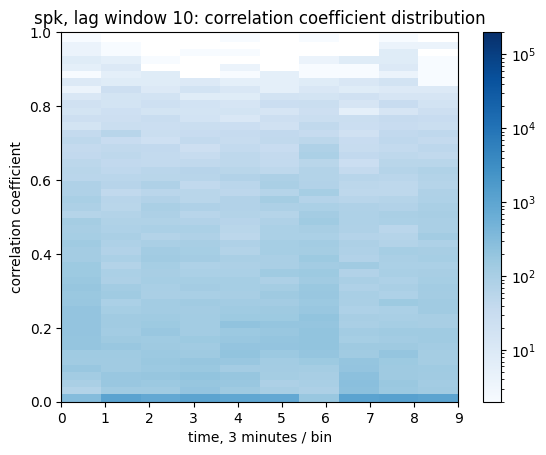

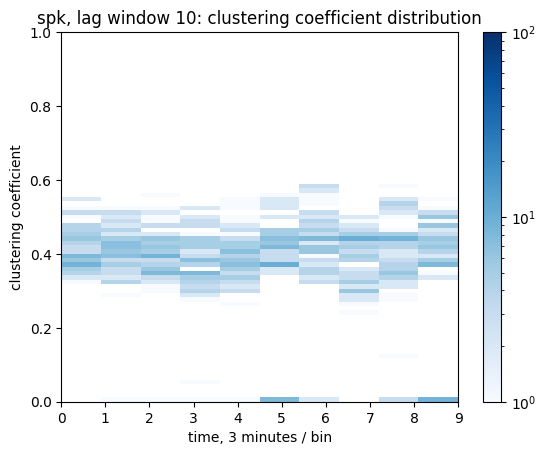

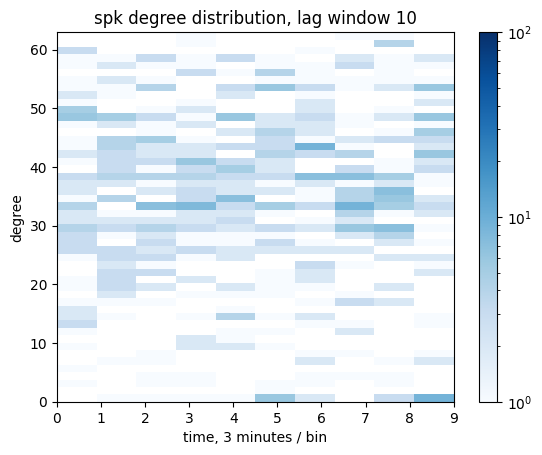

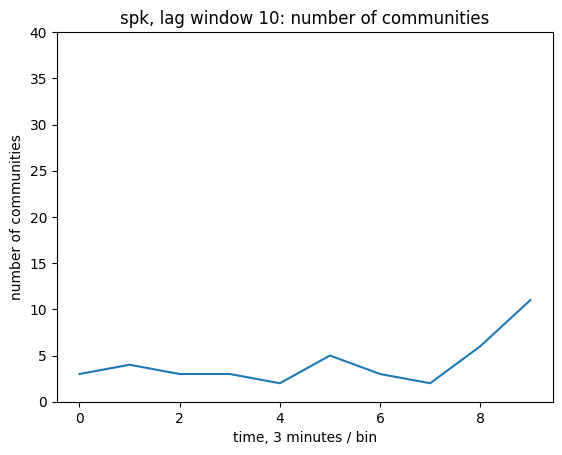

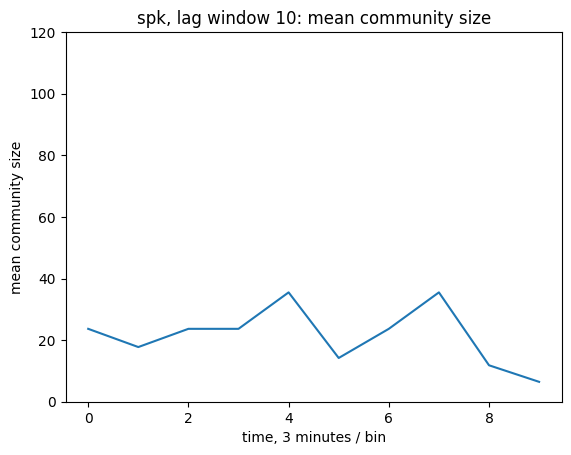

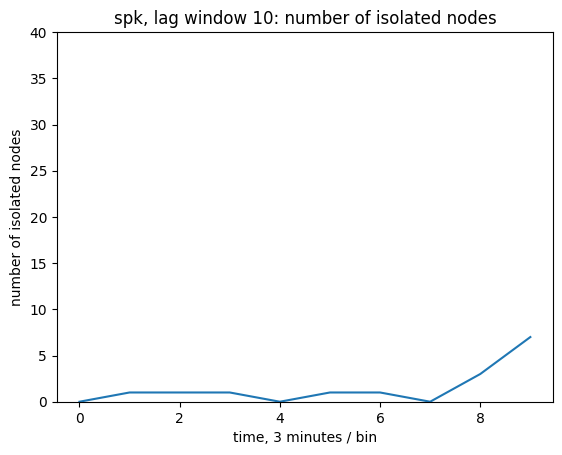

[[ 2.16156383e-04  7.35433335e-05 -1.93160986e-05]
 [ 7.35433335e-05  2.09249385e-04 -4.14086580e-04]
 [-1.93160986e-05 -4.14086580e-04  2.64420280e-03]]


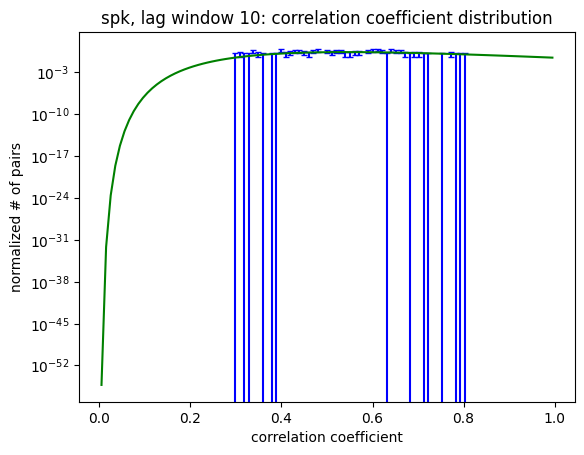

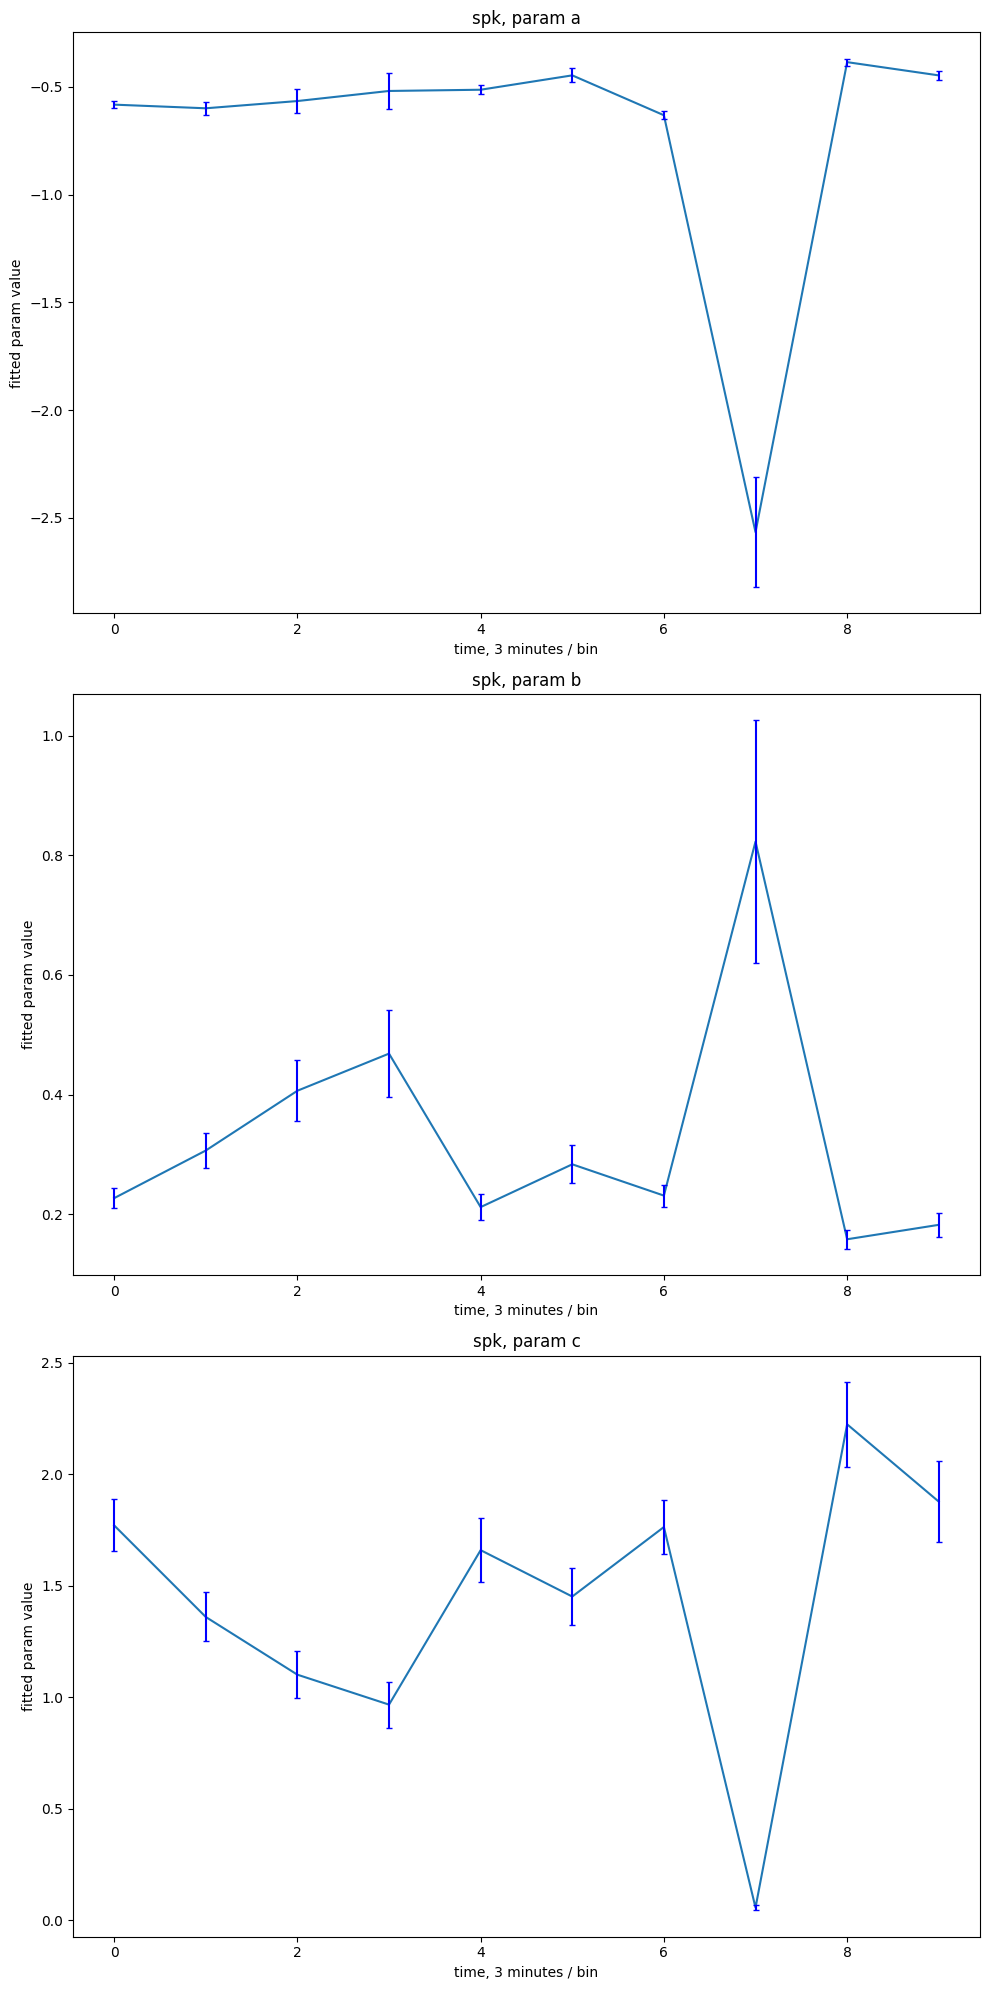

0.93642104


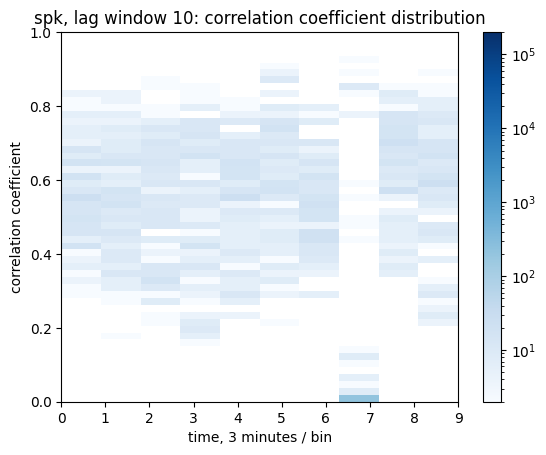

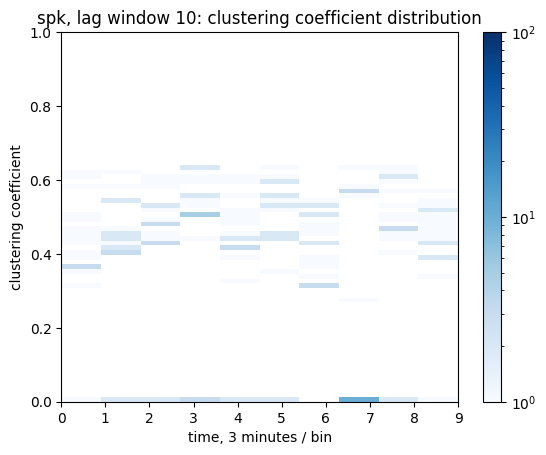

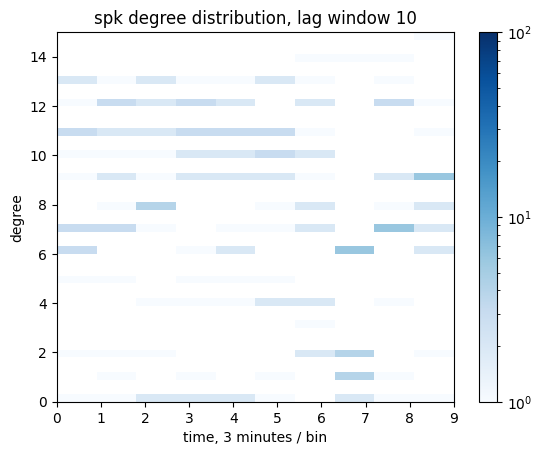

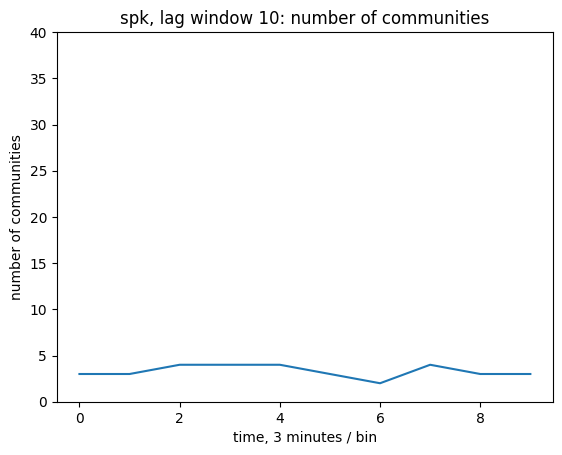

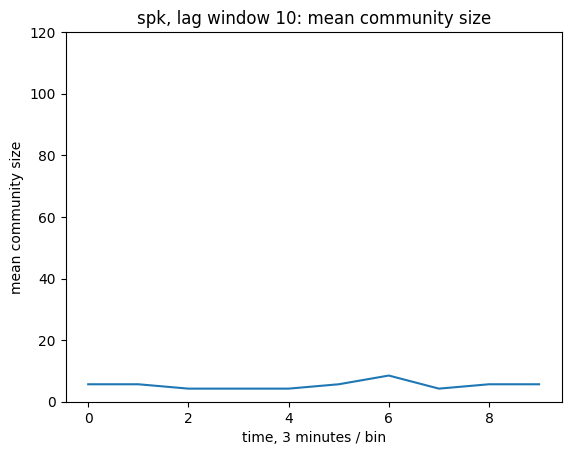

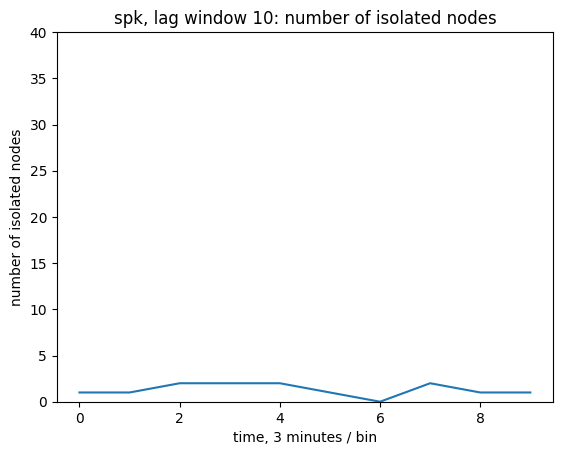

[[0.24676871 0.06391358 0.10424812]
 [0.06391358 0.01685946 0.02656648]
 [0.10424812 0.02656648 0.04481152]]


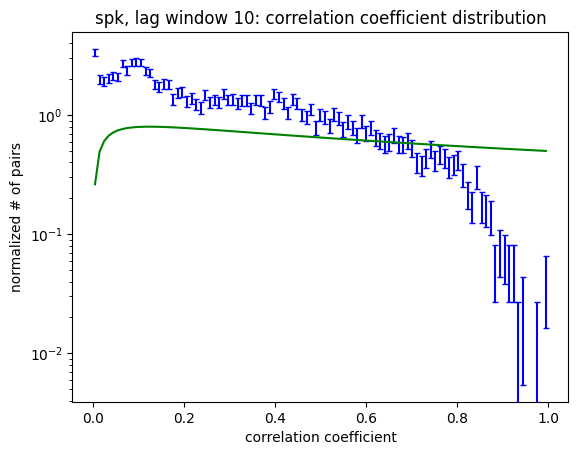

Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Optimal parameters not found: Number of calls to function has reached maxfev = 800.


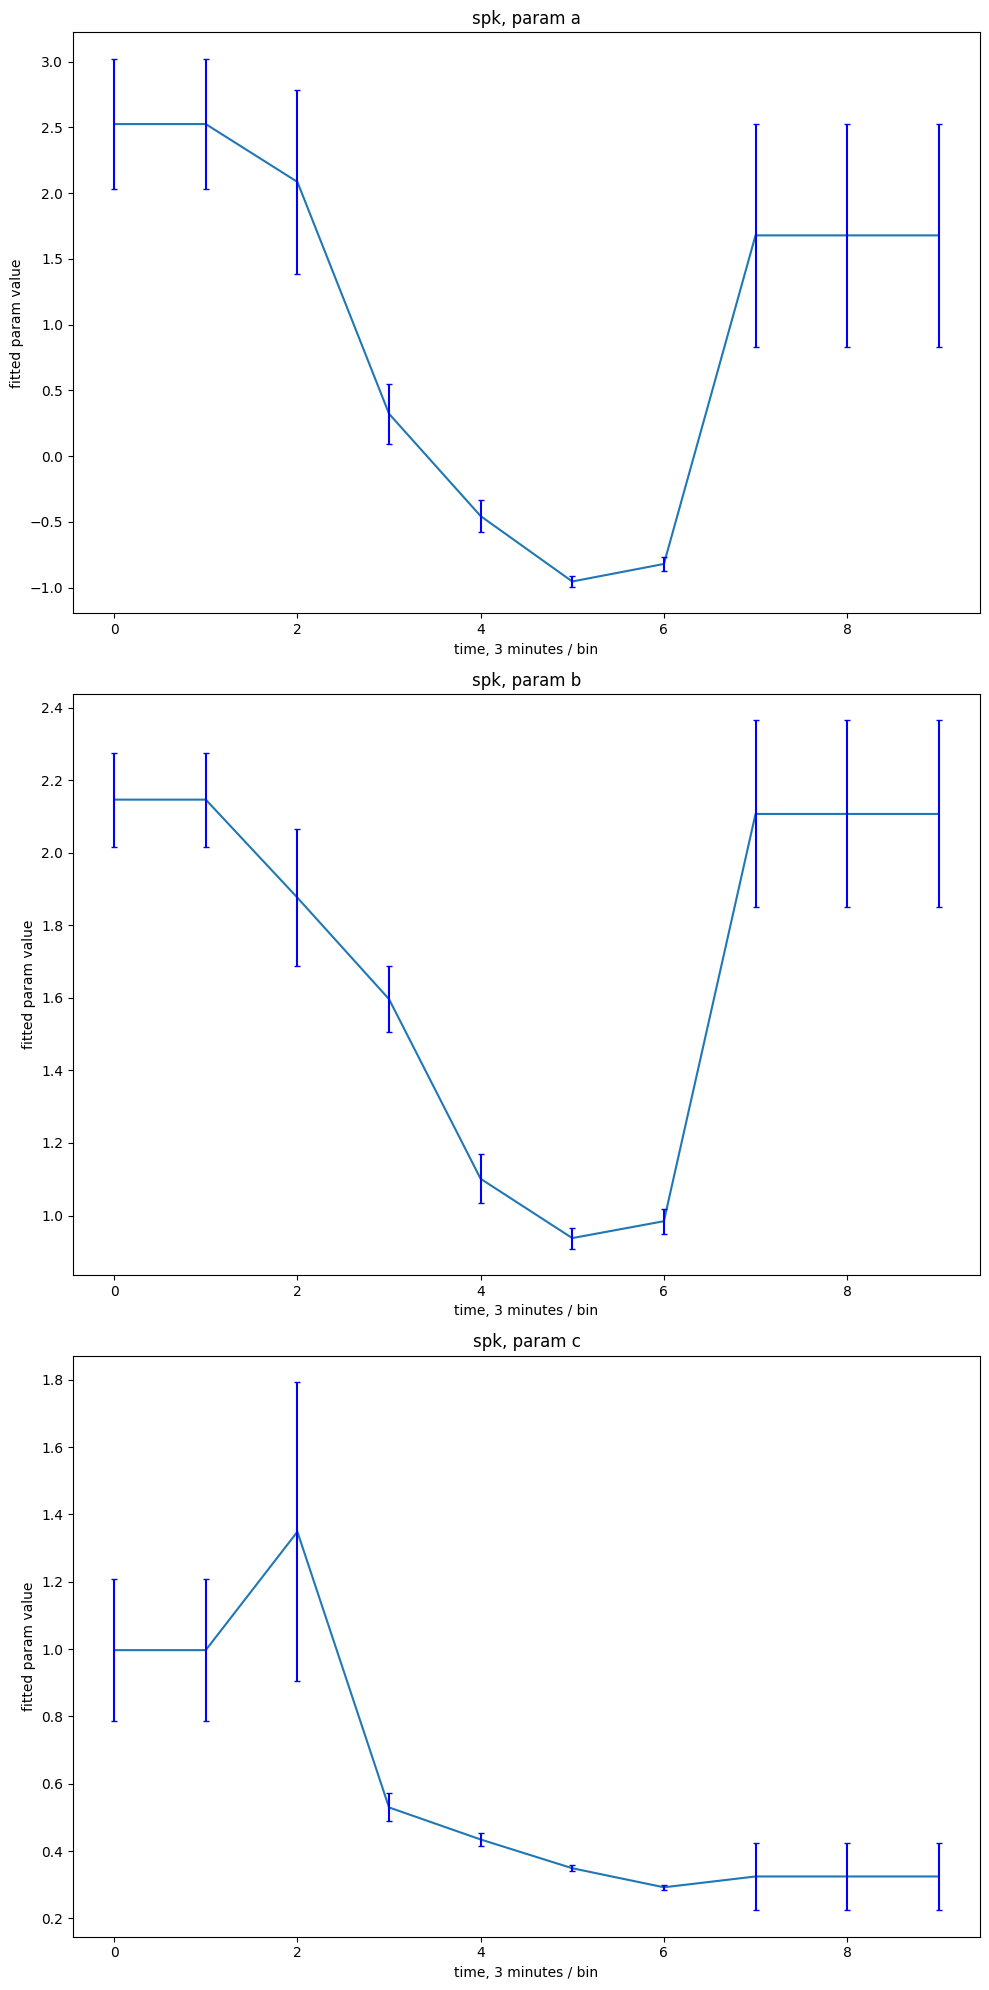

1.0000002


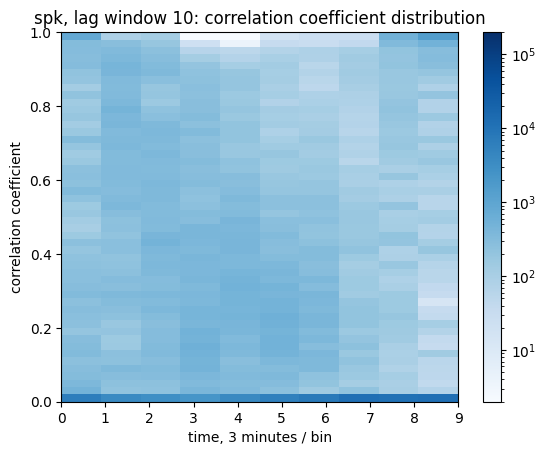

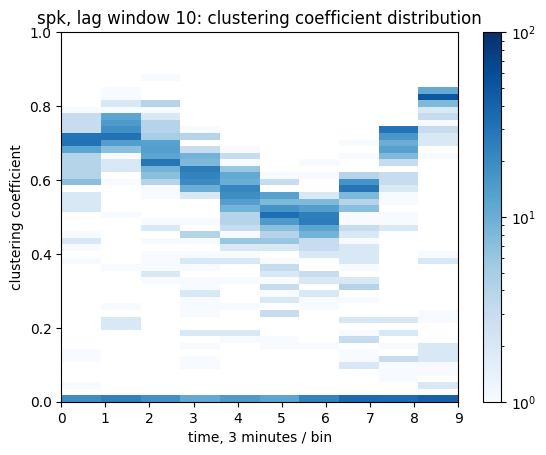

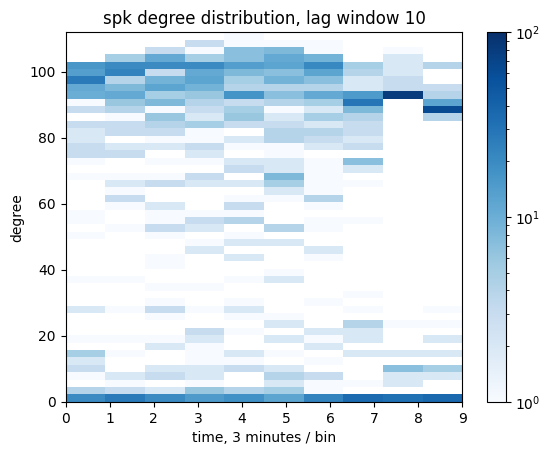

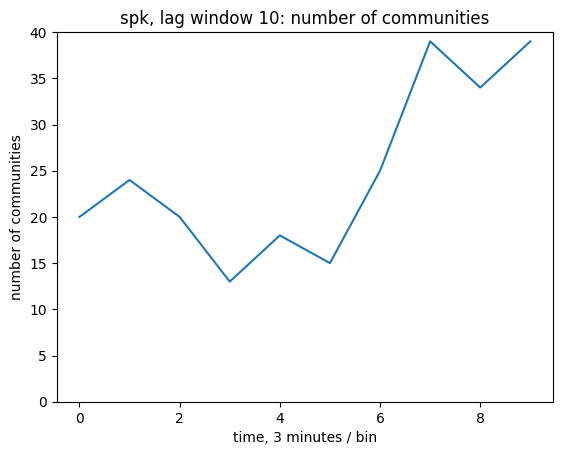

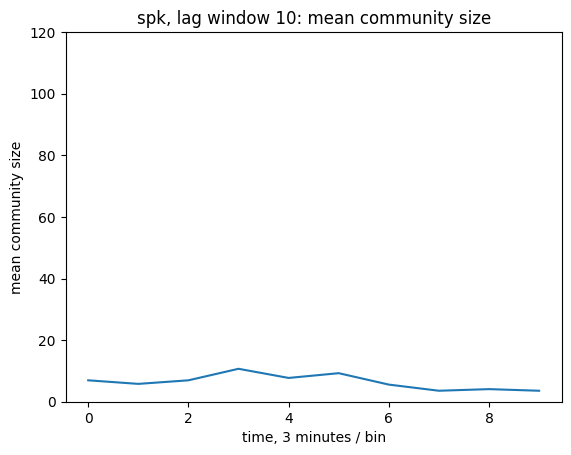

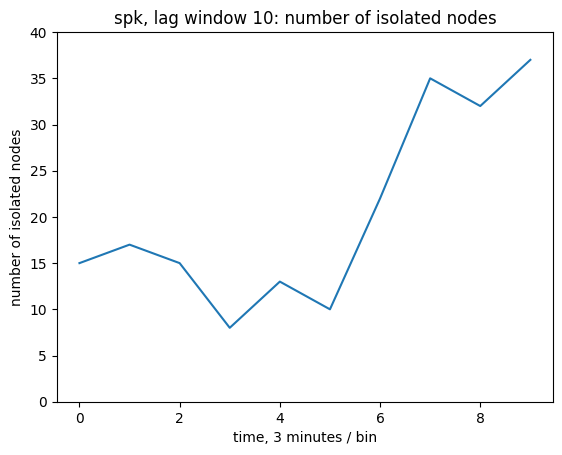

[[ 8.53905725e-04  4.55225694e-04  2.99943739e-05]
 [ 4.55225694e-04  5.66109669e-04 -1.57001108e-04]
 [ 2.99943739e-05 -1.57001108e-04  2.72775524e-04]]


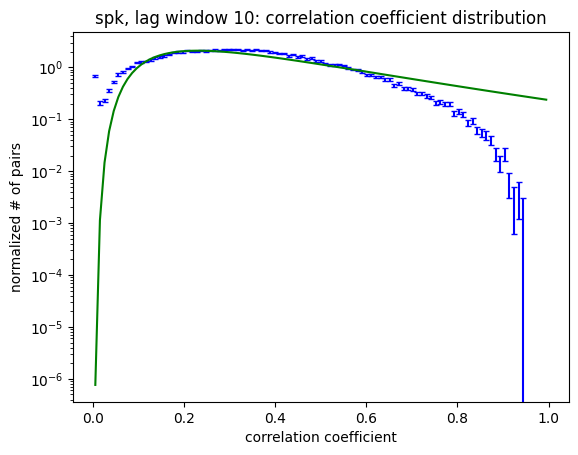

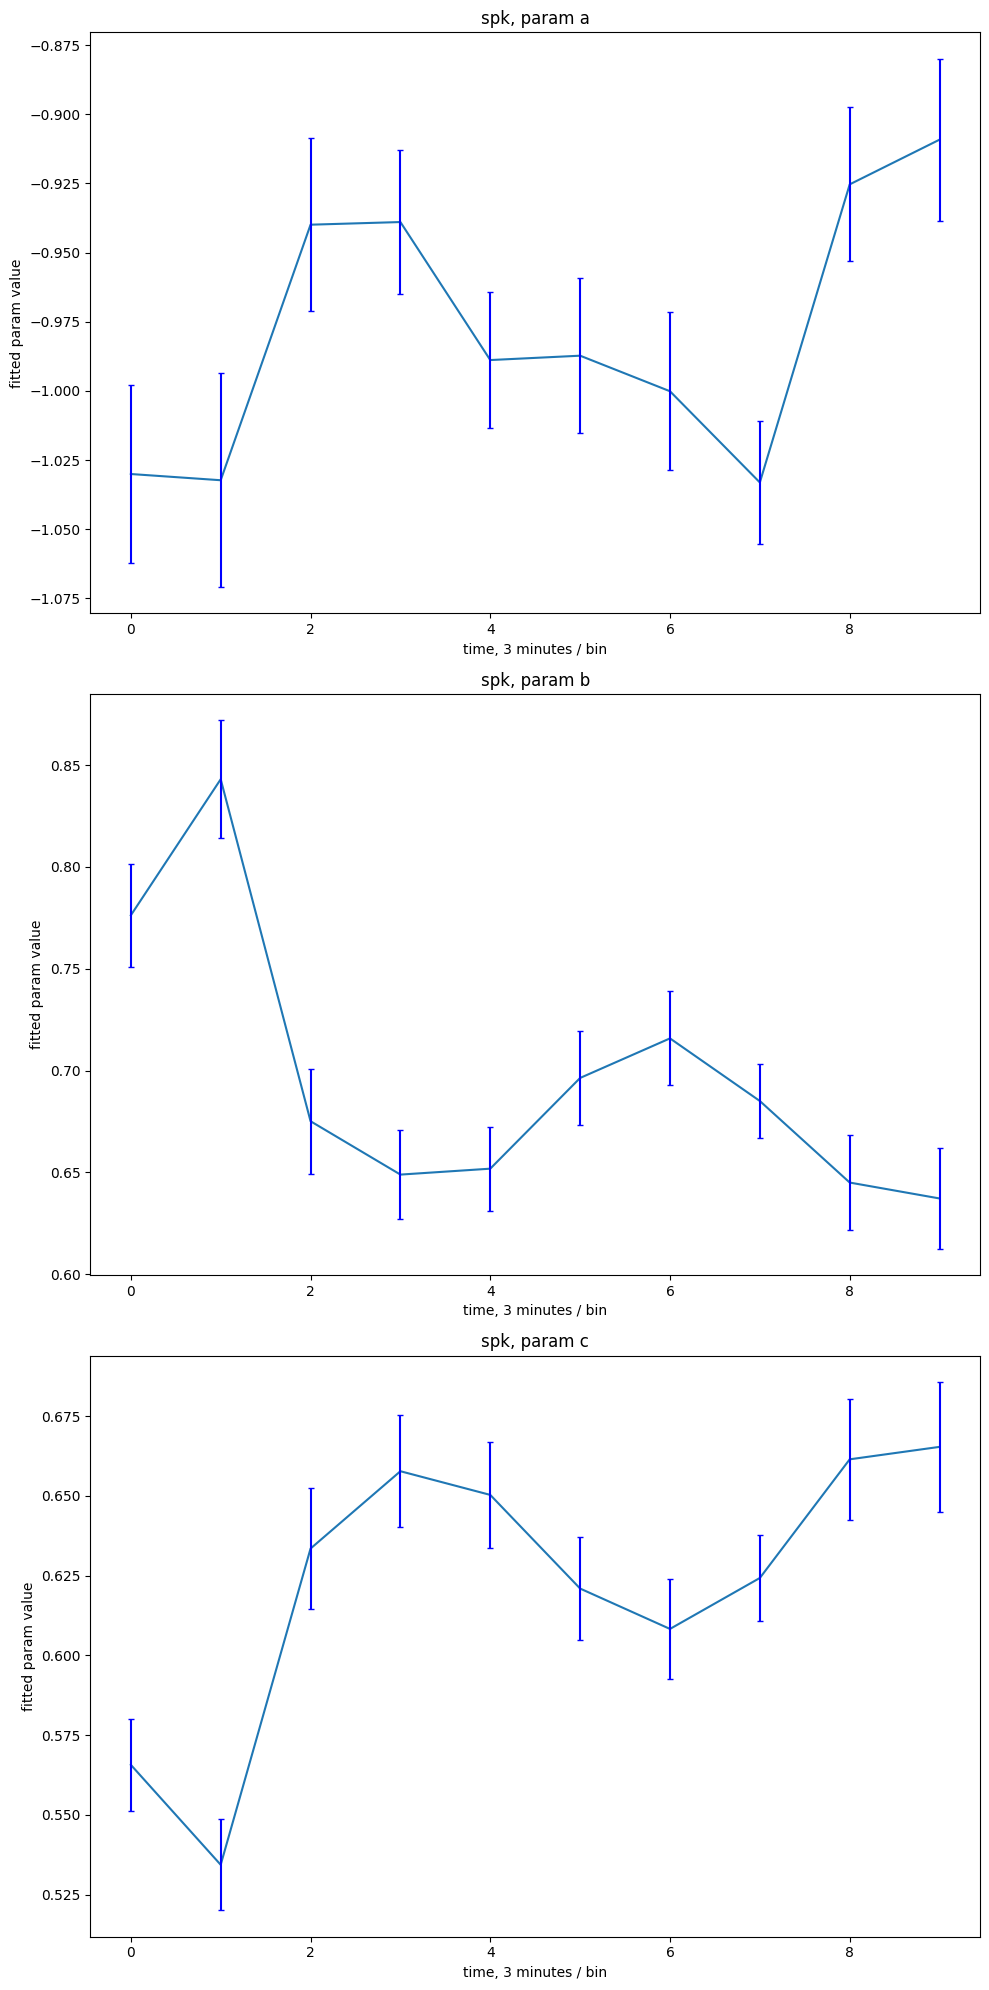

0.960876


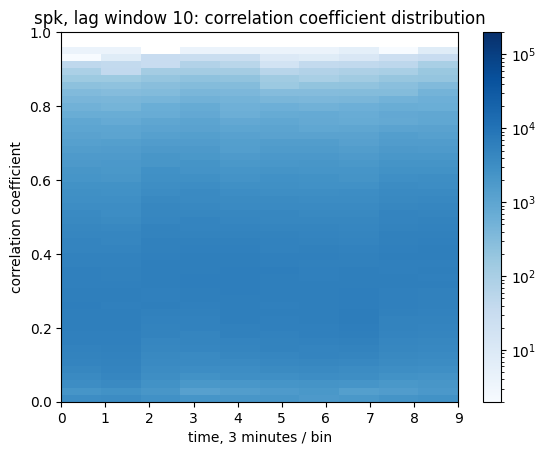

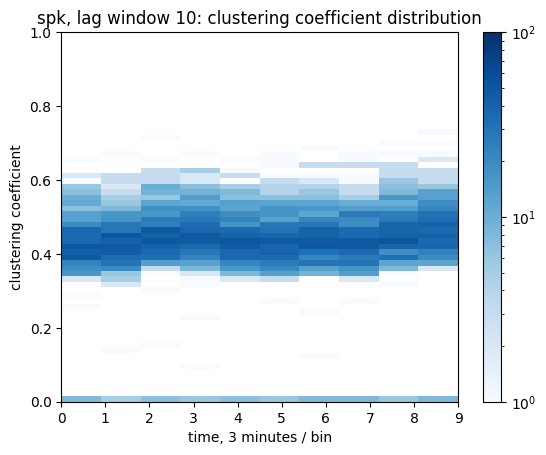

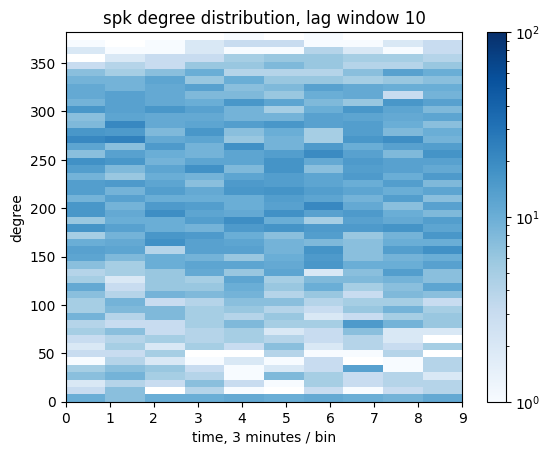

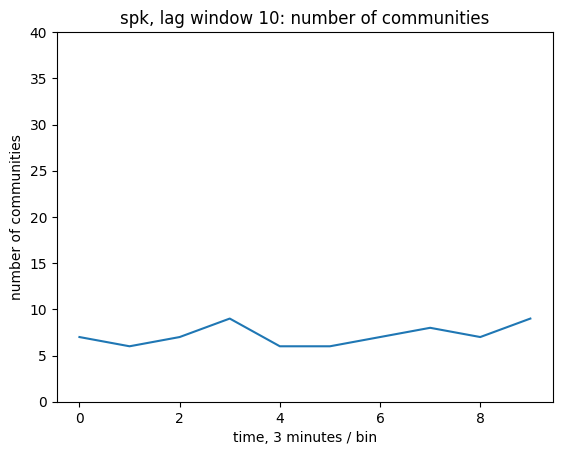

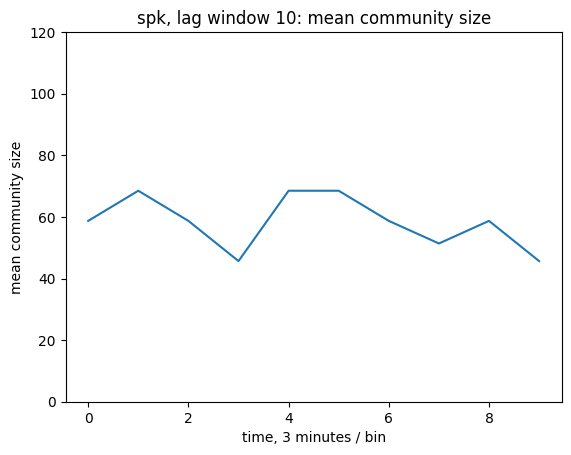

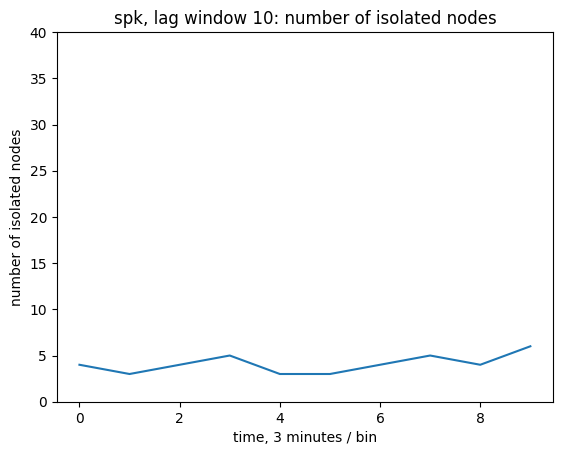

[[0.00545239 0.0030408  0.00082518]
 [0.0030408  0.00223135 0.00016402]
 [0.00082518 0.00016402 0.00062773]]


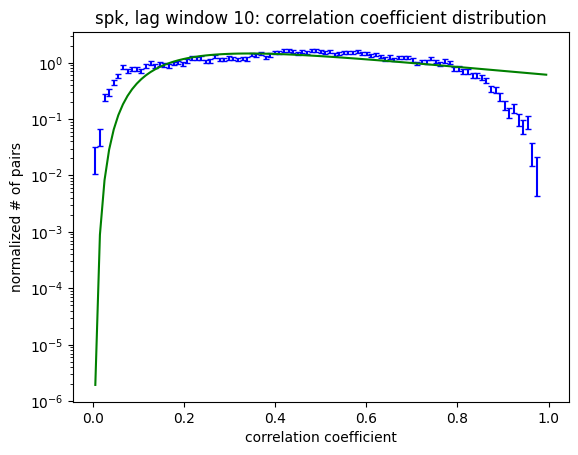

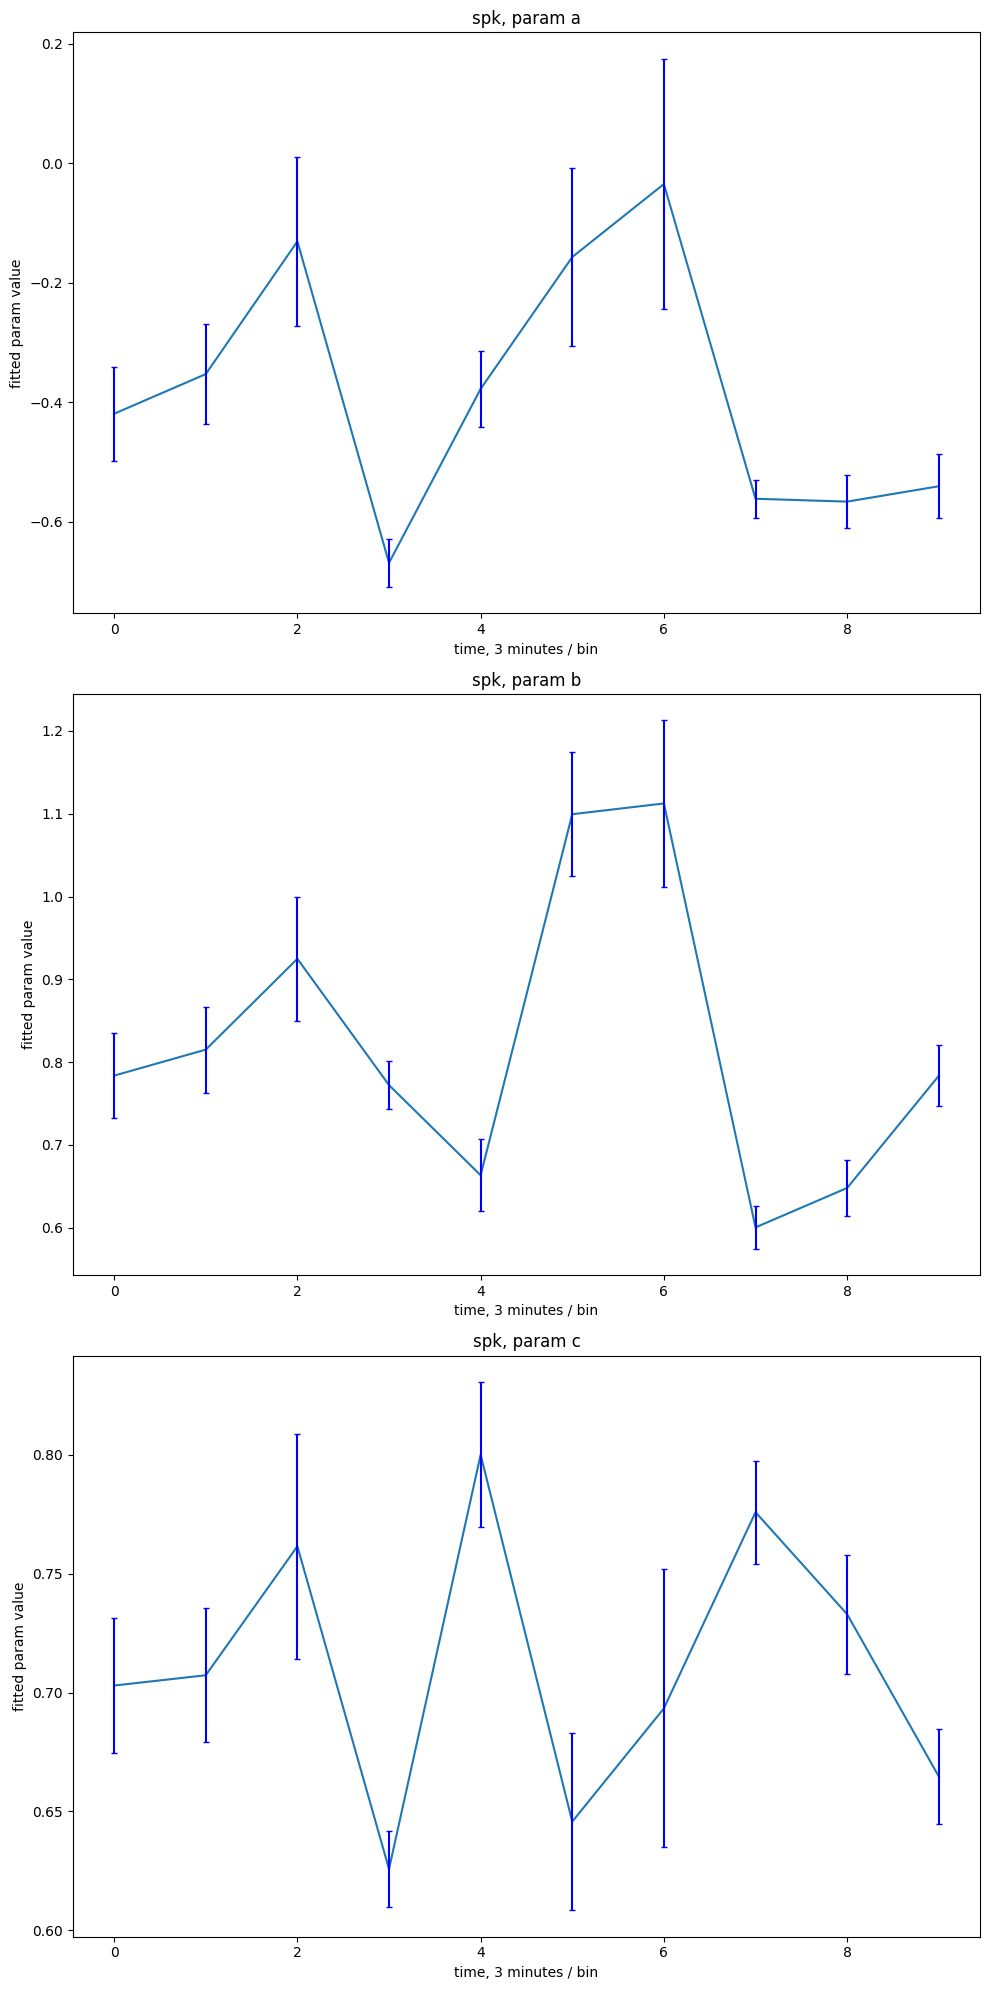

0.9931542


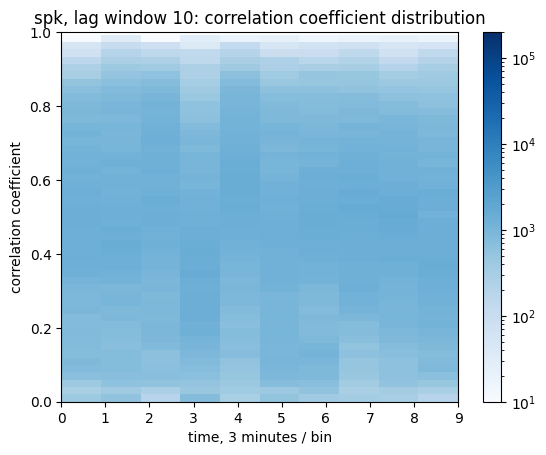

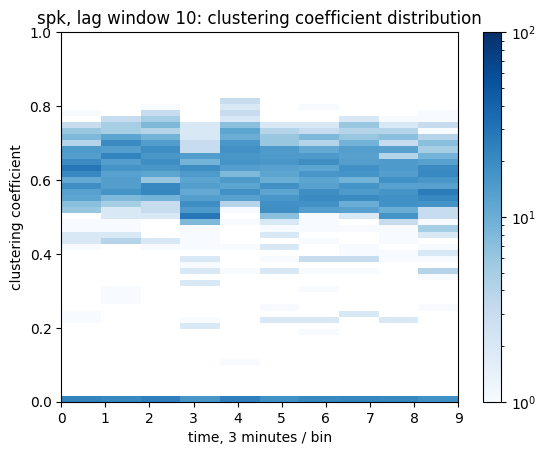

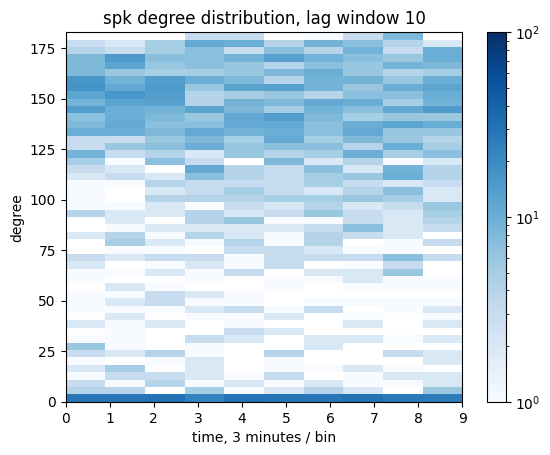

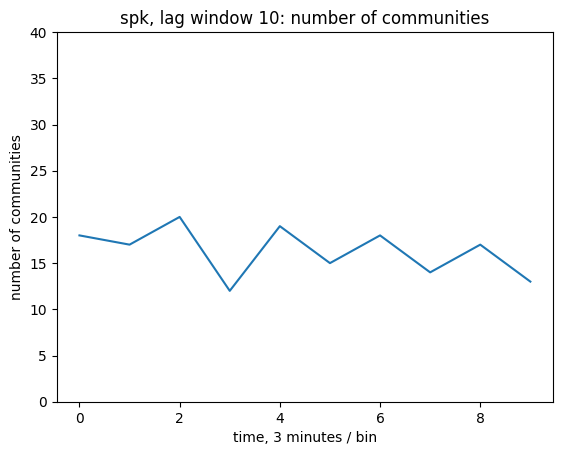

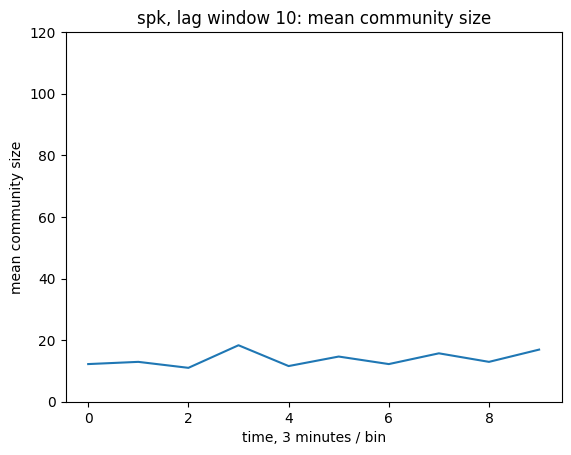

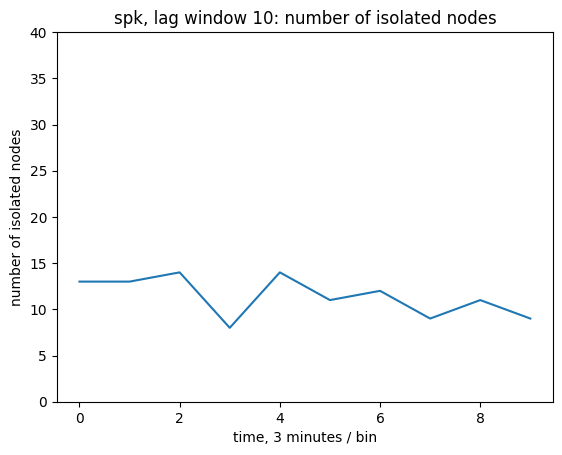

[[ 4.43142841e-04  2.41014566e-04 -4.55605309e-05]
 [ 2.41014566e-04  3.90606287e-04 -3.87322393e-04]
 [-4.55605309e-05 -3.87322393e-04  1.54339392e-03]]


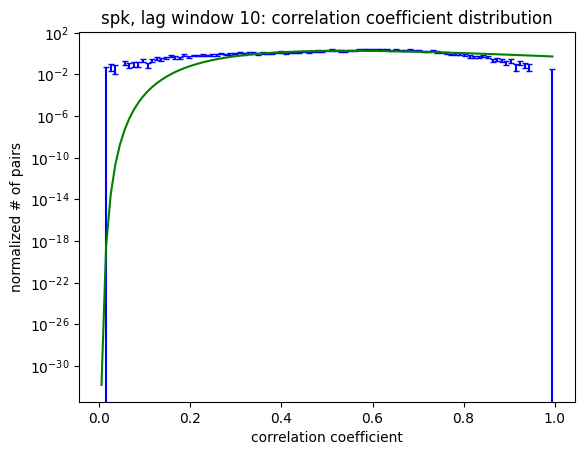

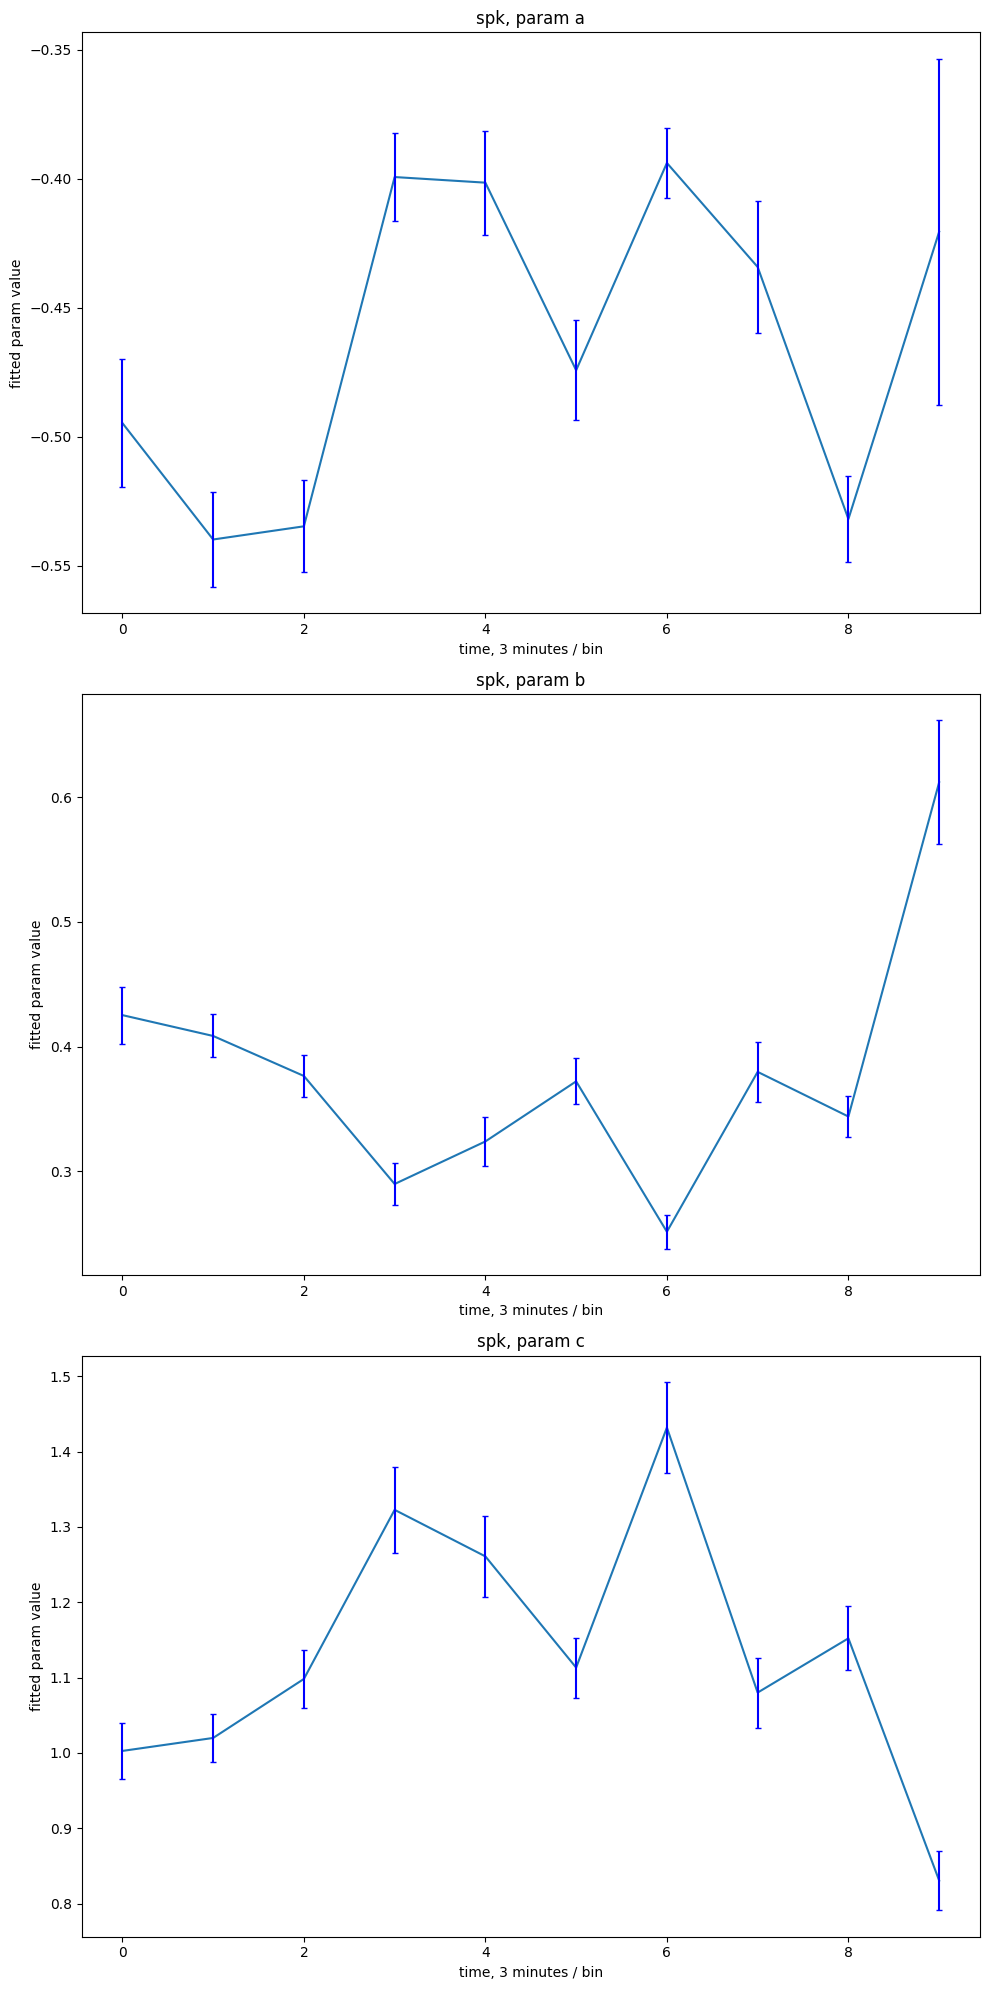

0.98432165


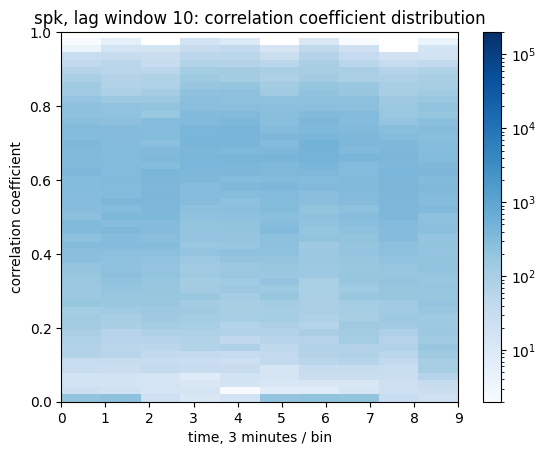

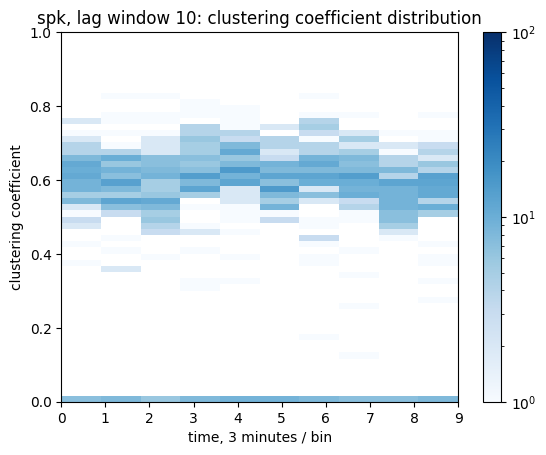

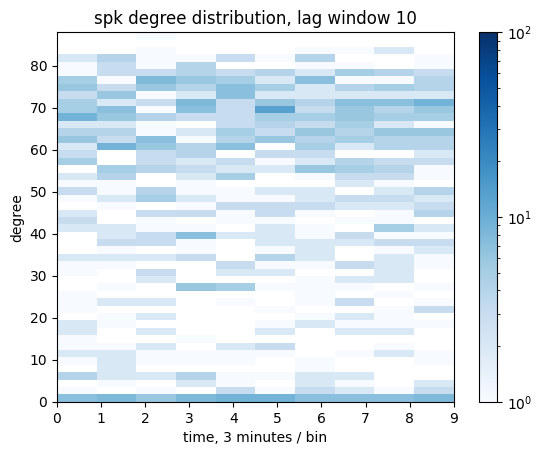

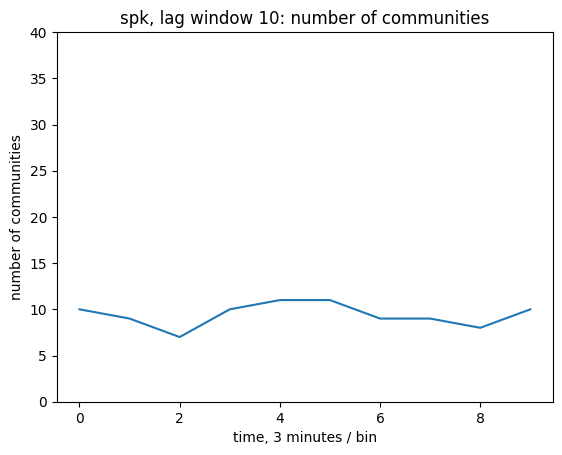

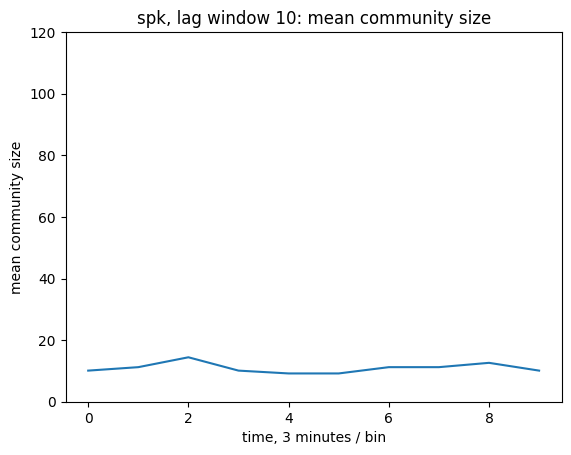

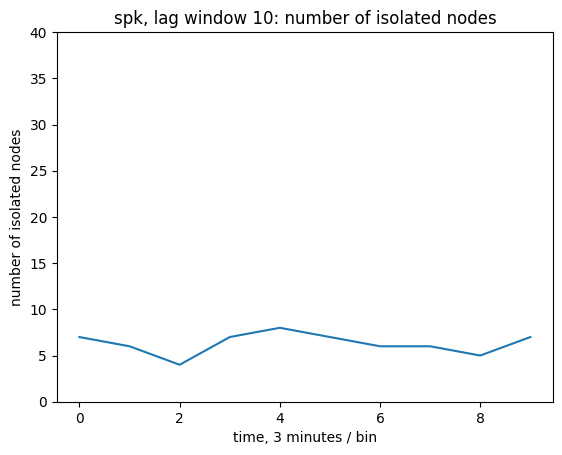

[[0.00863397 0.00448092 0.00202696]
 [0.00448092 0.00278905 0.00075773]
 [0.00202696 0.00075773 0.00101472]]


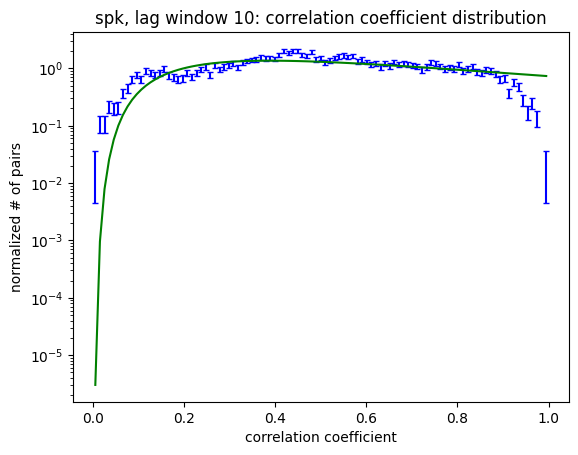

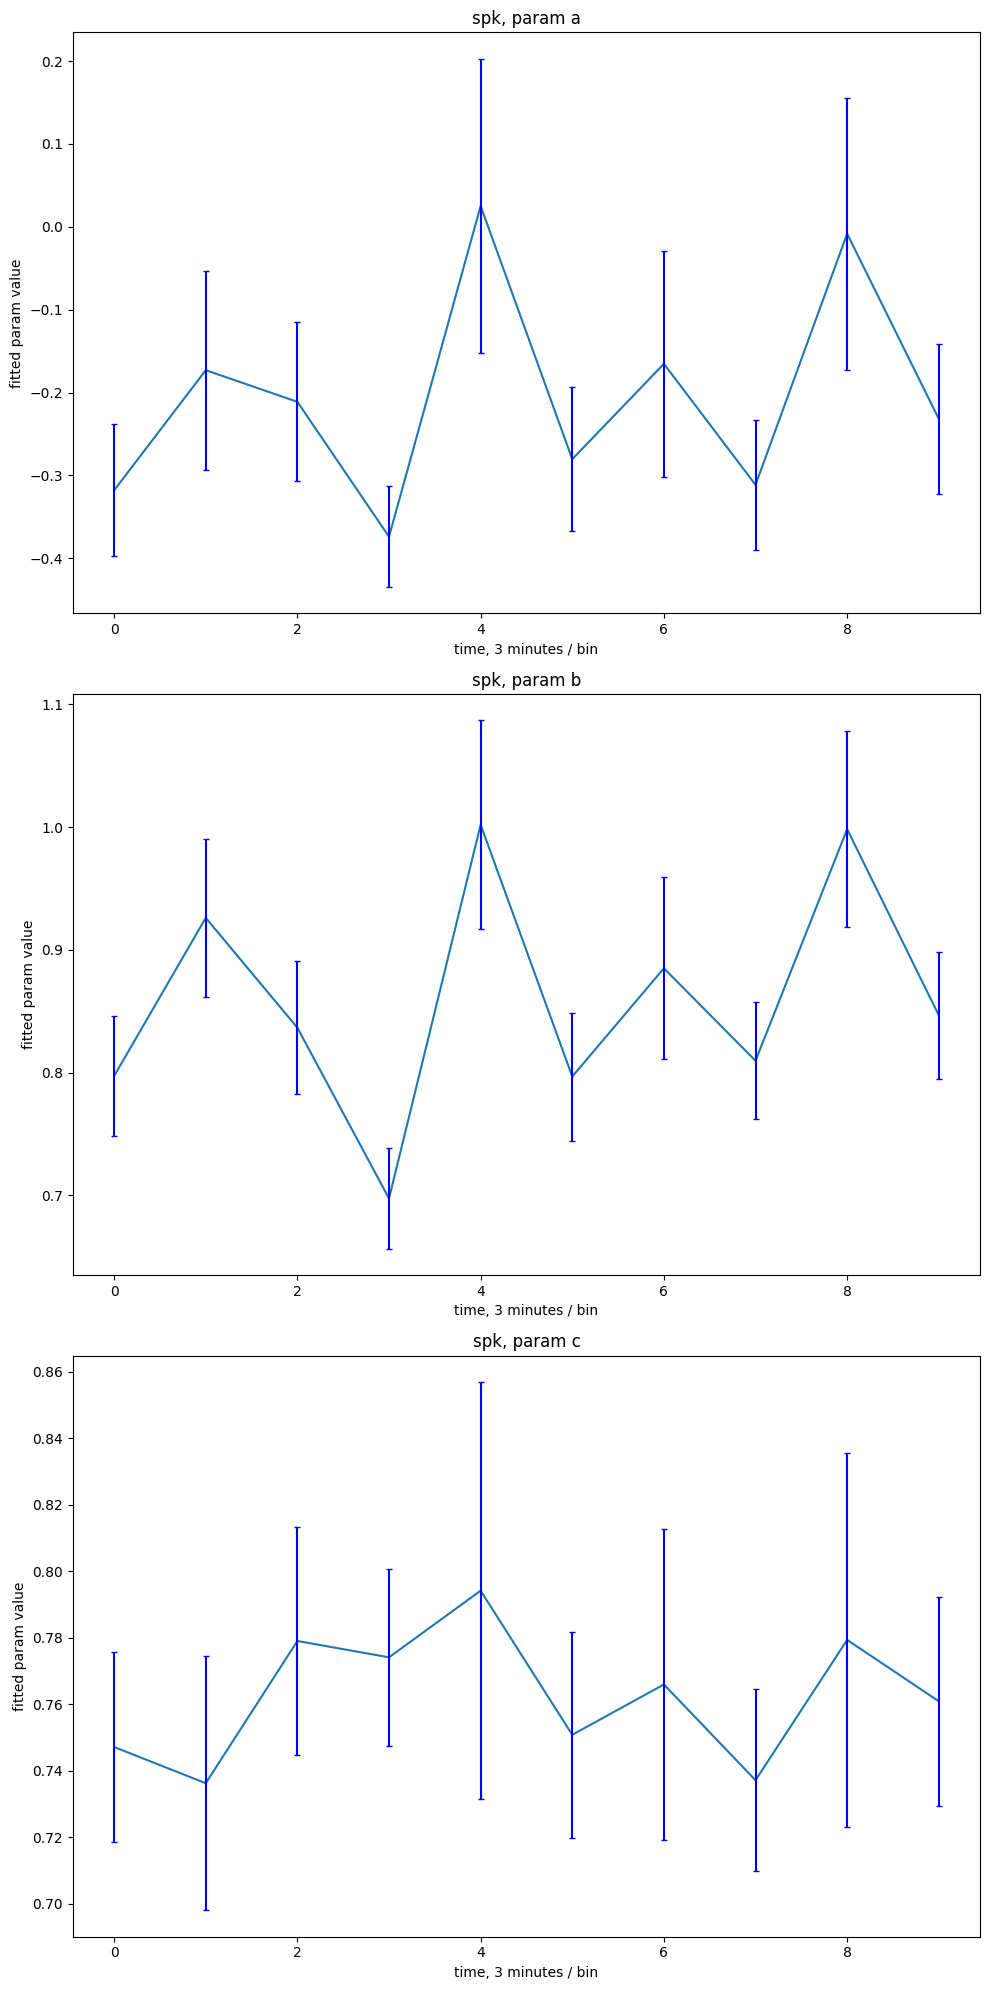

0.9986235


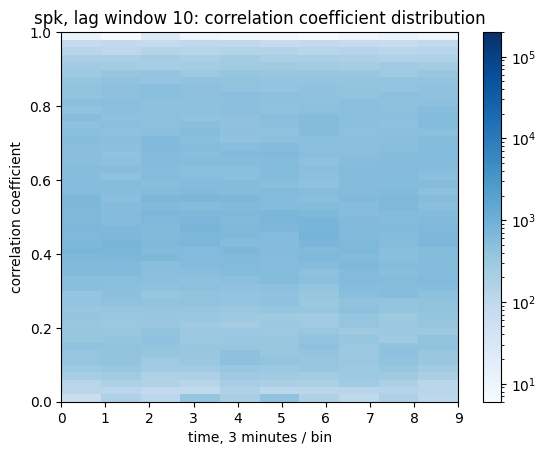

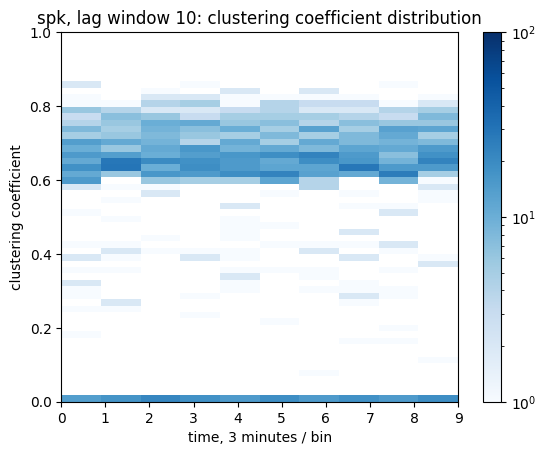

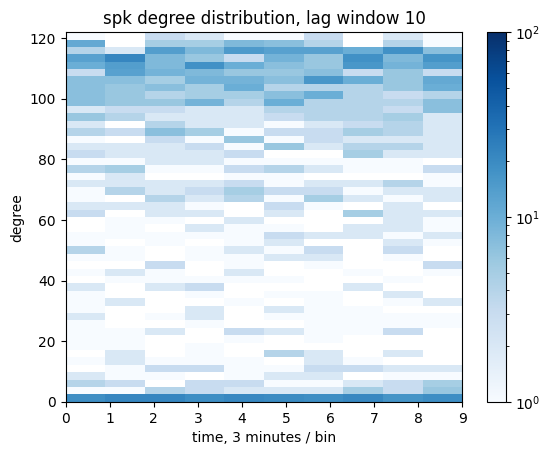

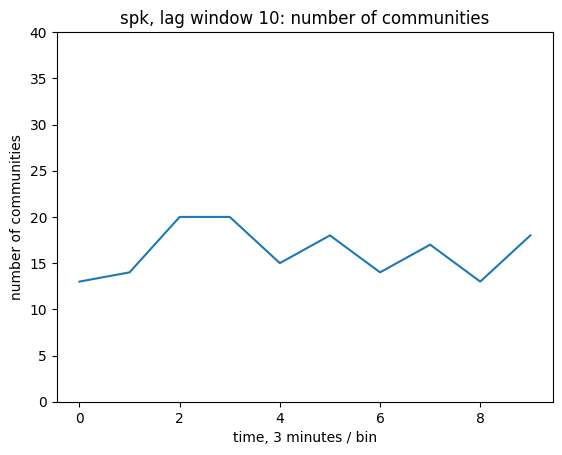

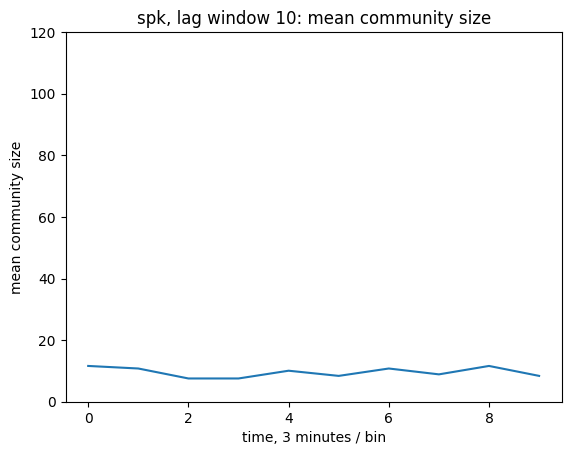

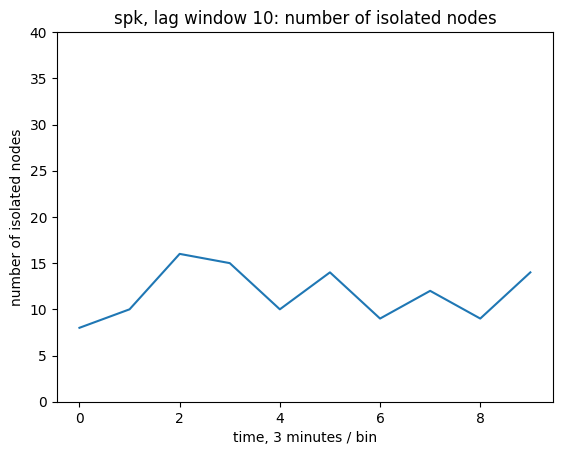

[[0.55544816 0.21644929 0.04812094]
 [0.21644929 0.08709293 0.01798924]
 [0.04812094 0.01798924 0.00446672]]


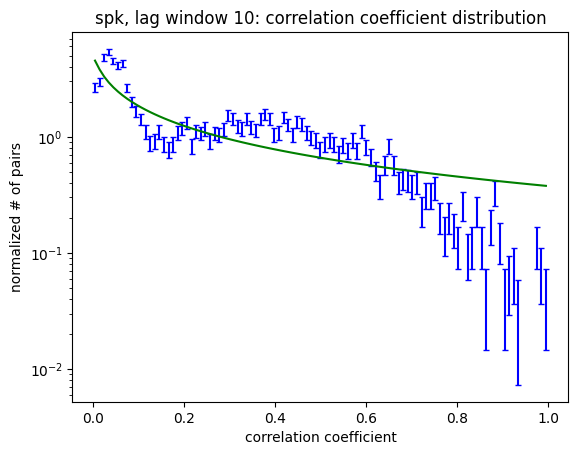

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


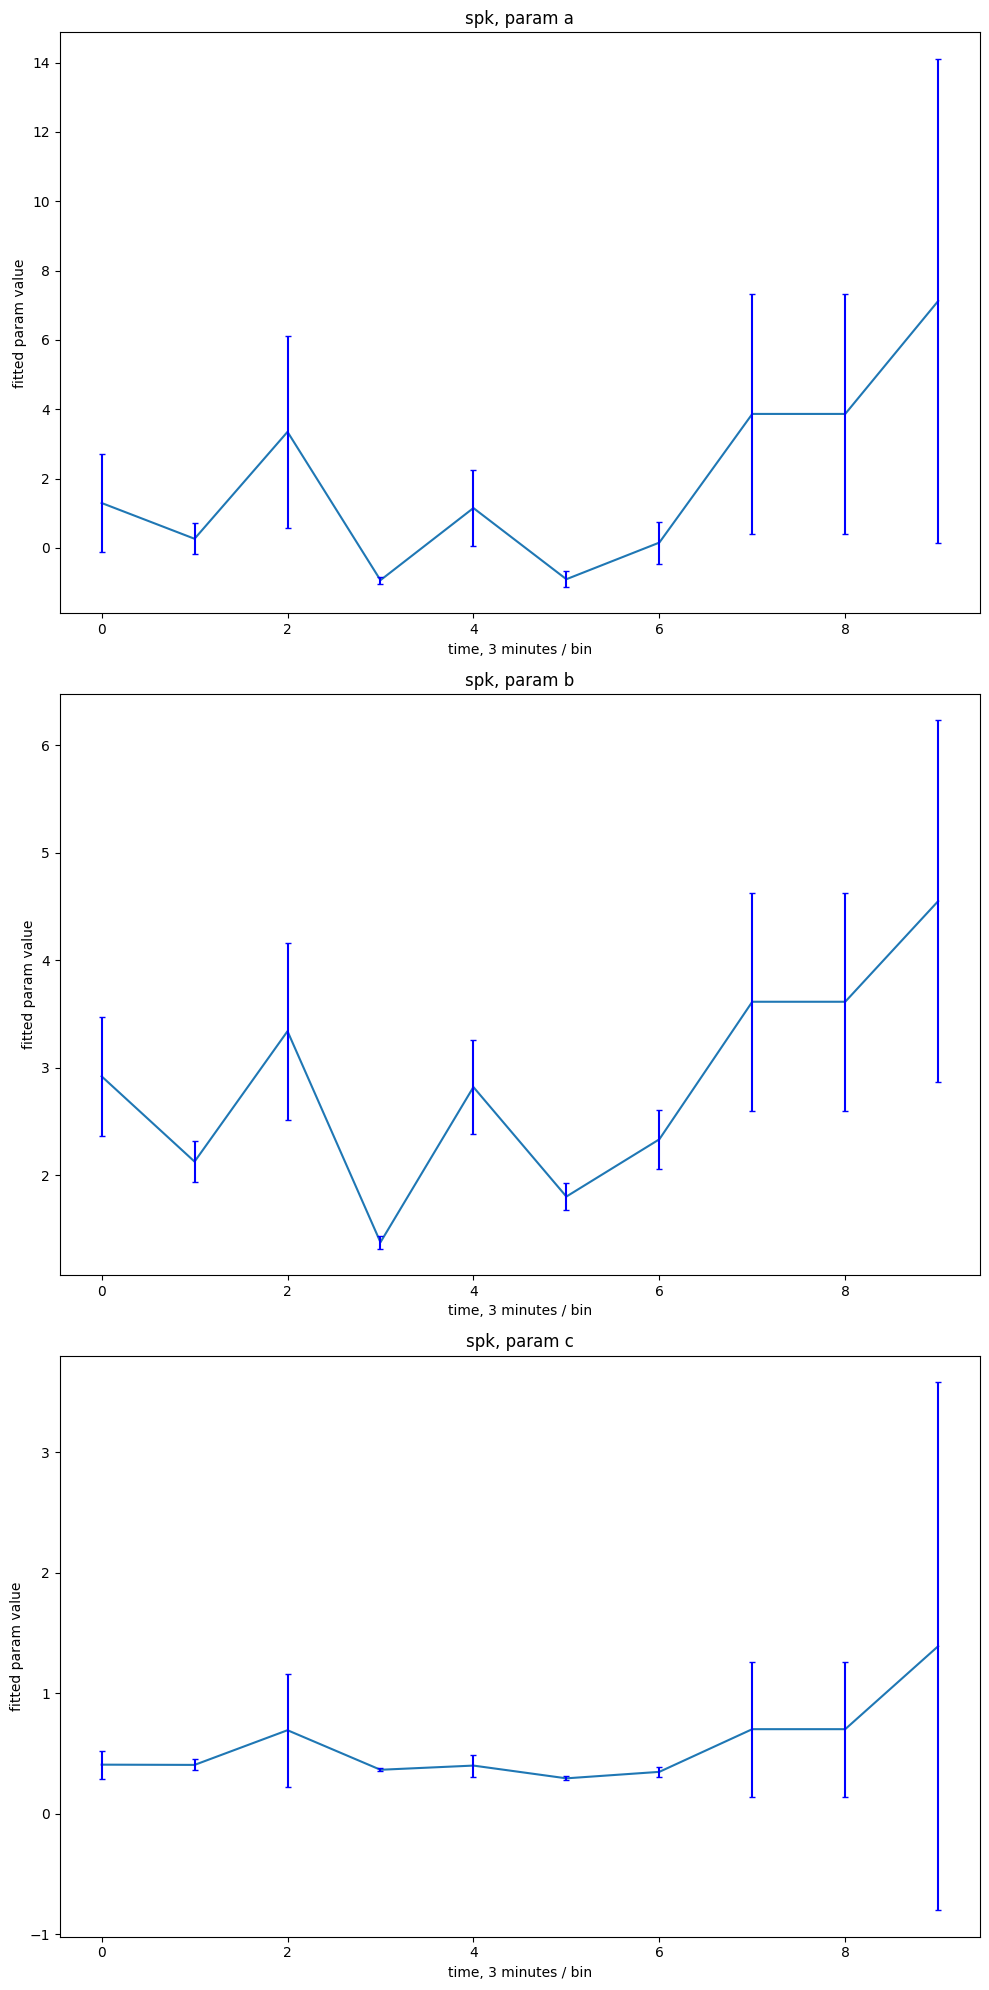

0.999992


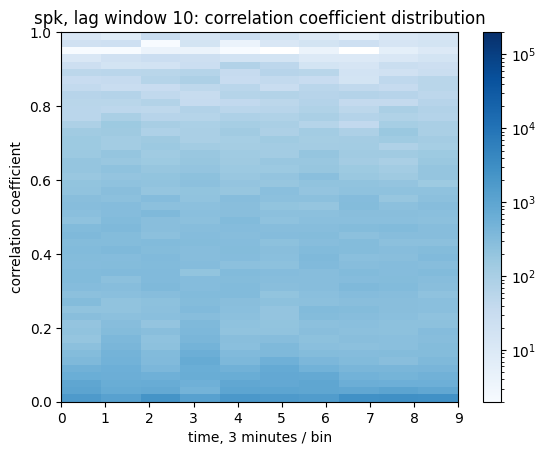

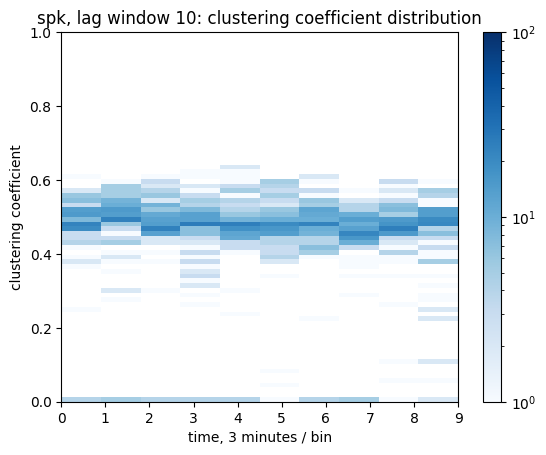

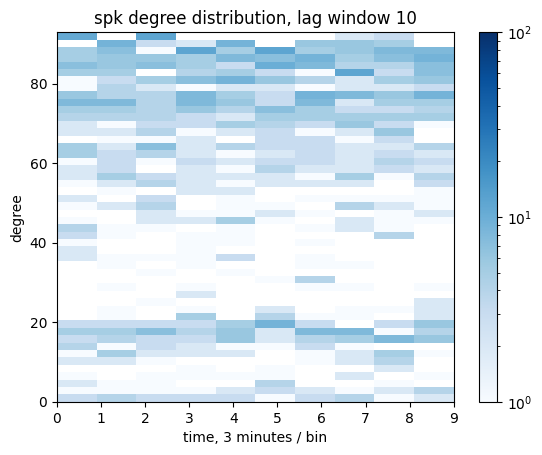

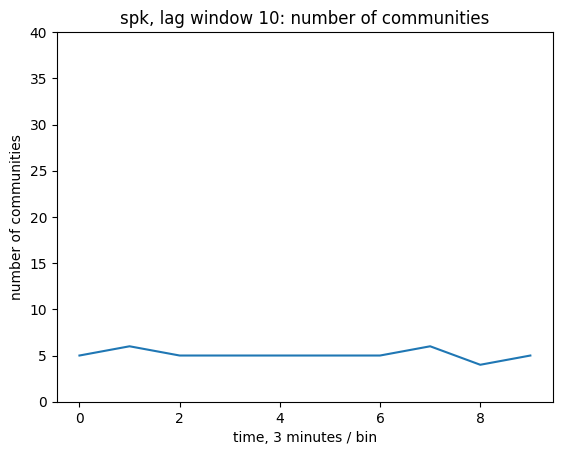

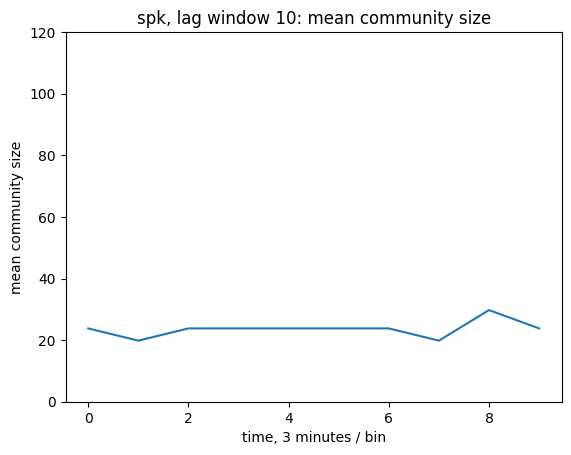

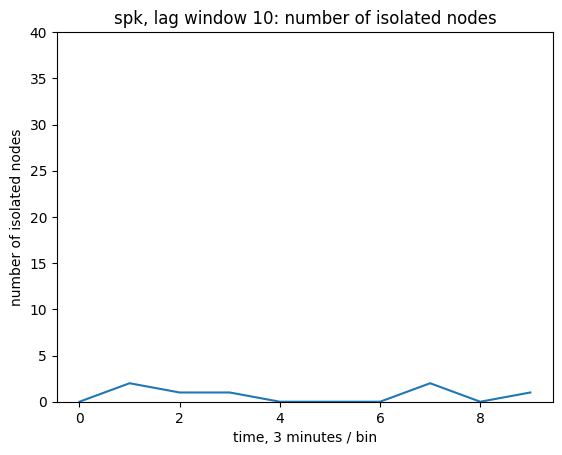

[[5.08804504e-03 2.60001475e-03 3.32293740e-04]
 [2.60001475e-03 1.76989938e-03 5.46050276e-05]
 [3.32293740e-04 5.46050276e-05 1.02356958e-04]]


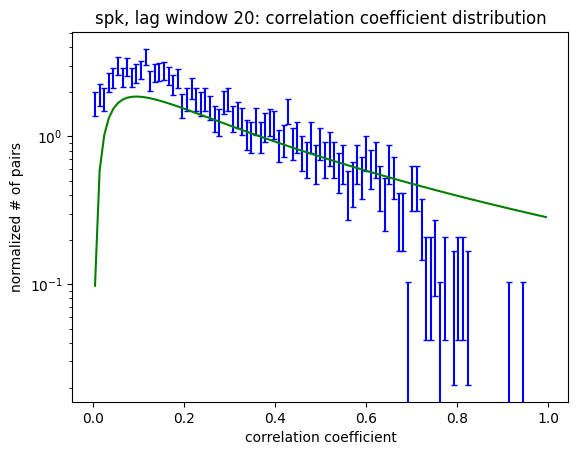

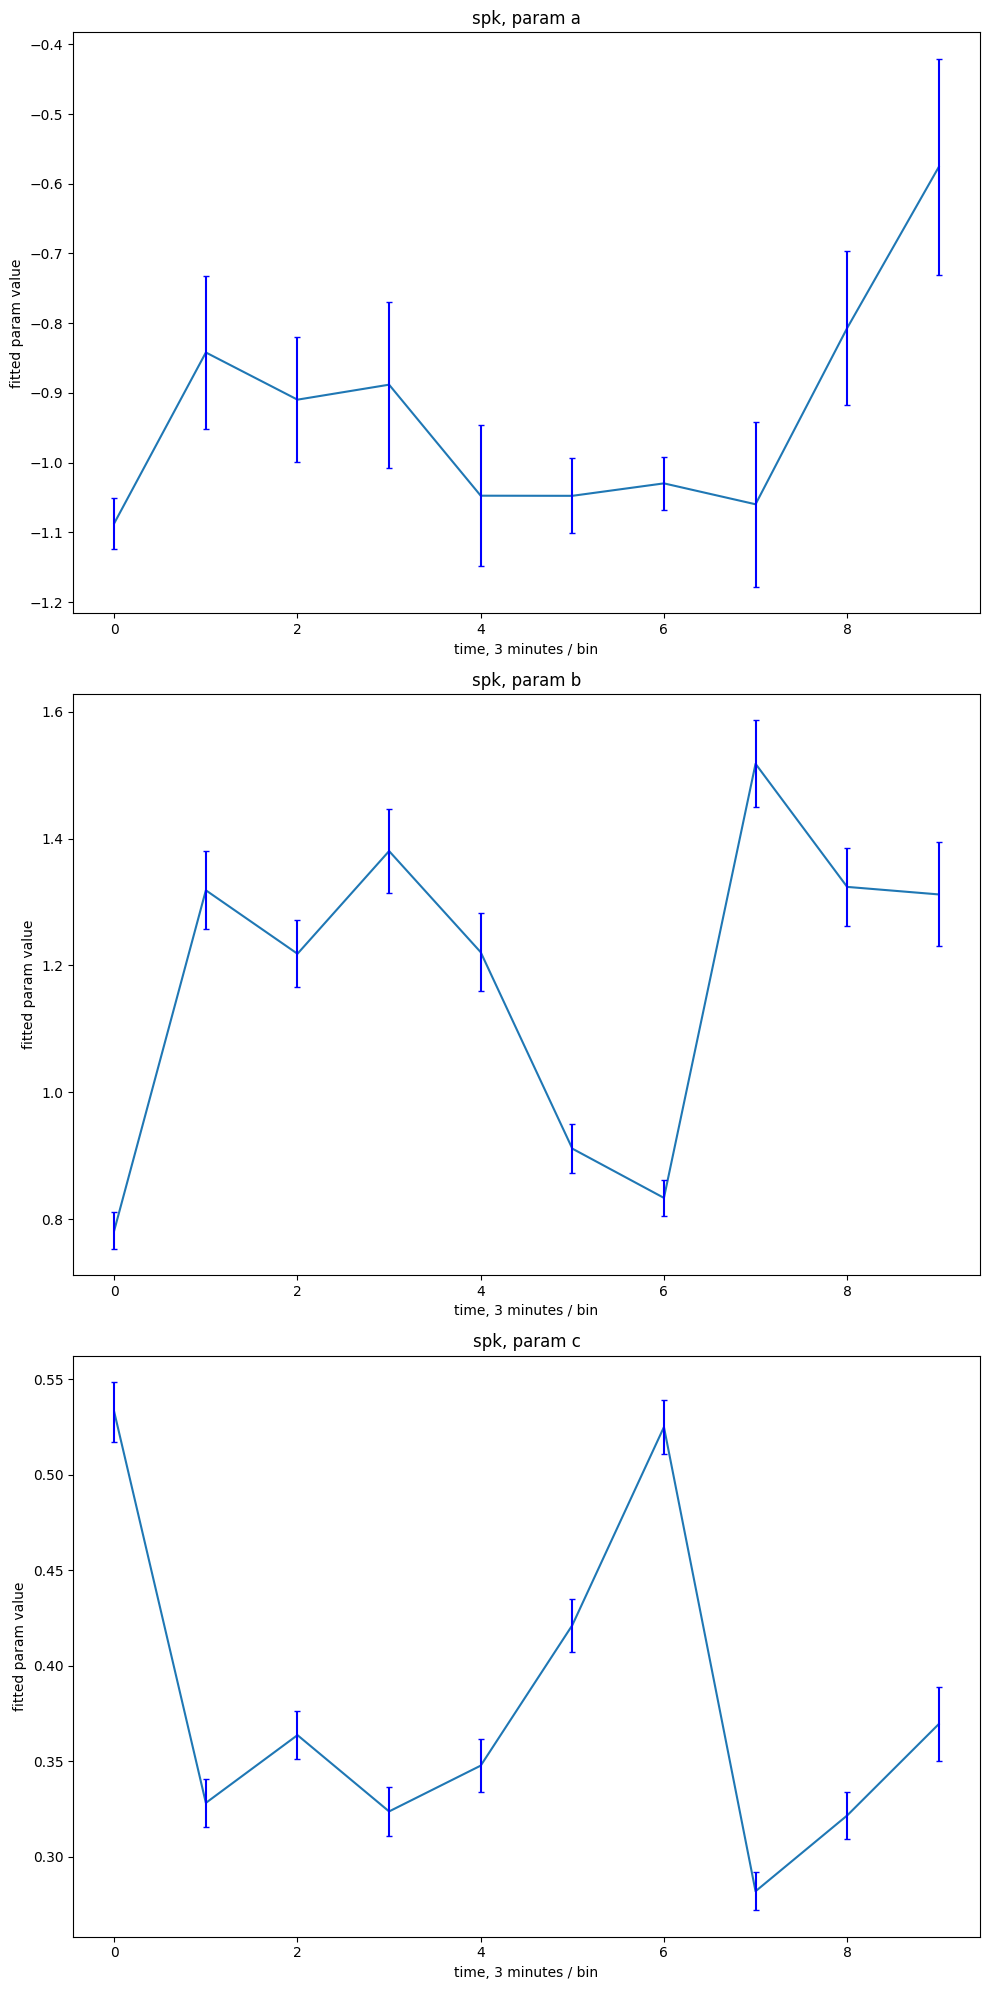

0.9943438


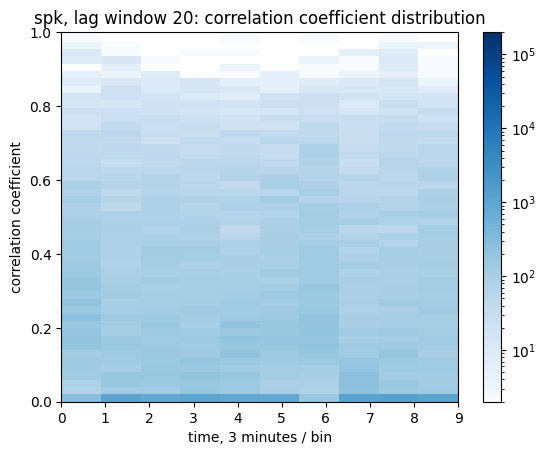

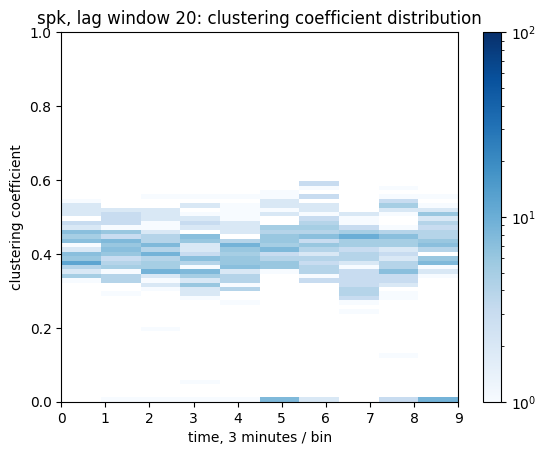

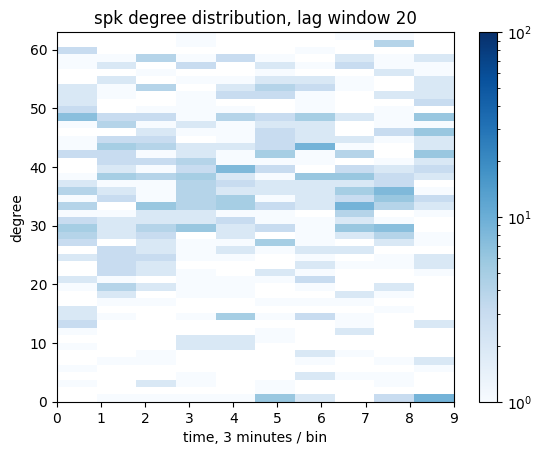

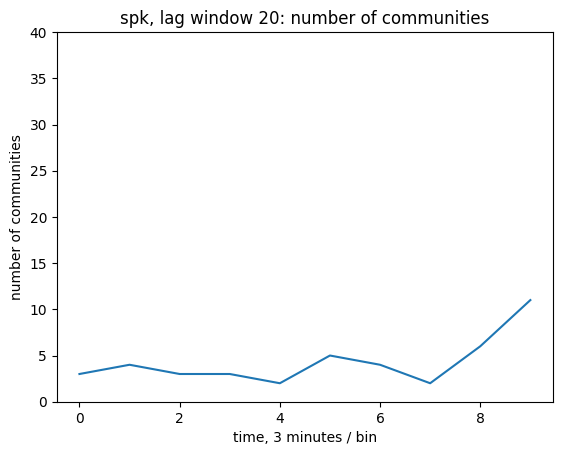

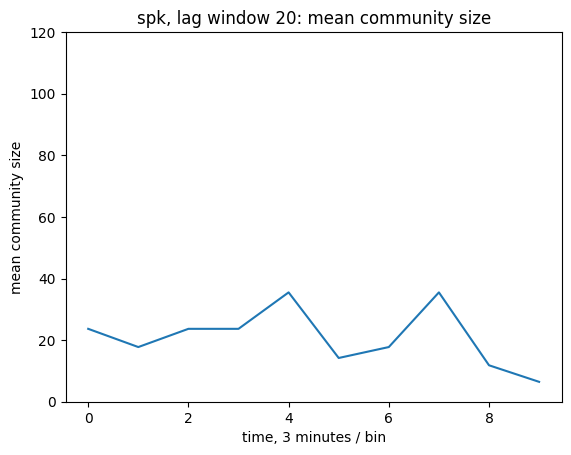

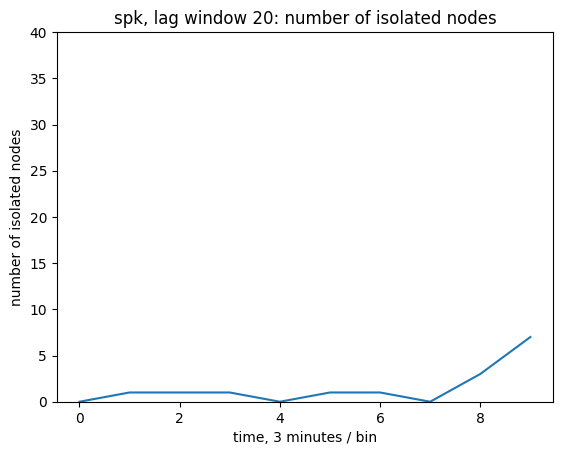

[[ 2.09297808e-04  7.03839989e-05 -1.99462452e-05]
 [ 7.03839989e-05  2.03473109e-04 -4.18488645e-04]
 [-1.99462452e-05 -4.18488645e-04  2.76532171e-03]]


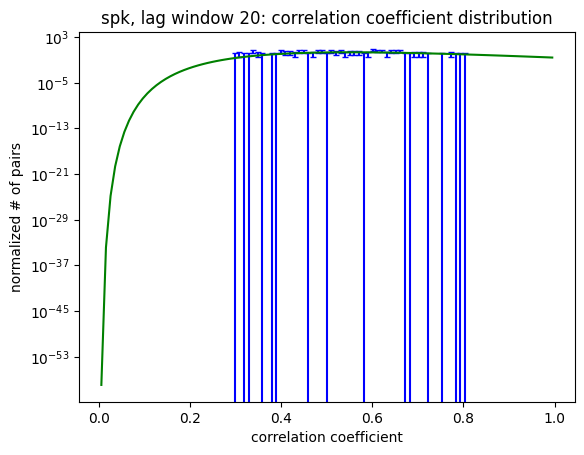

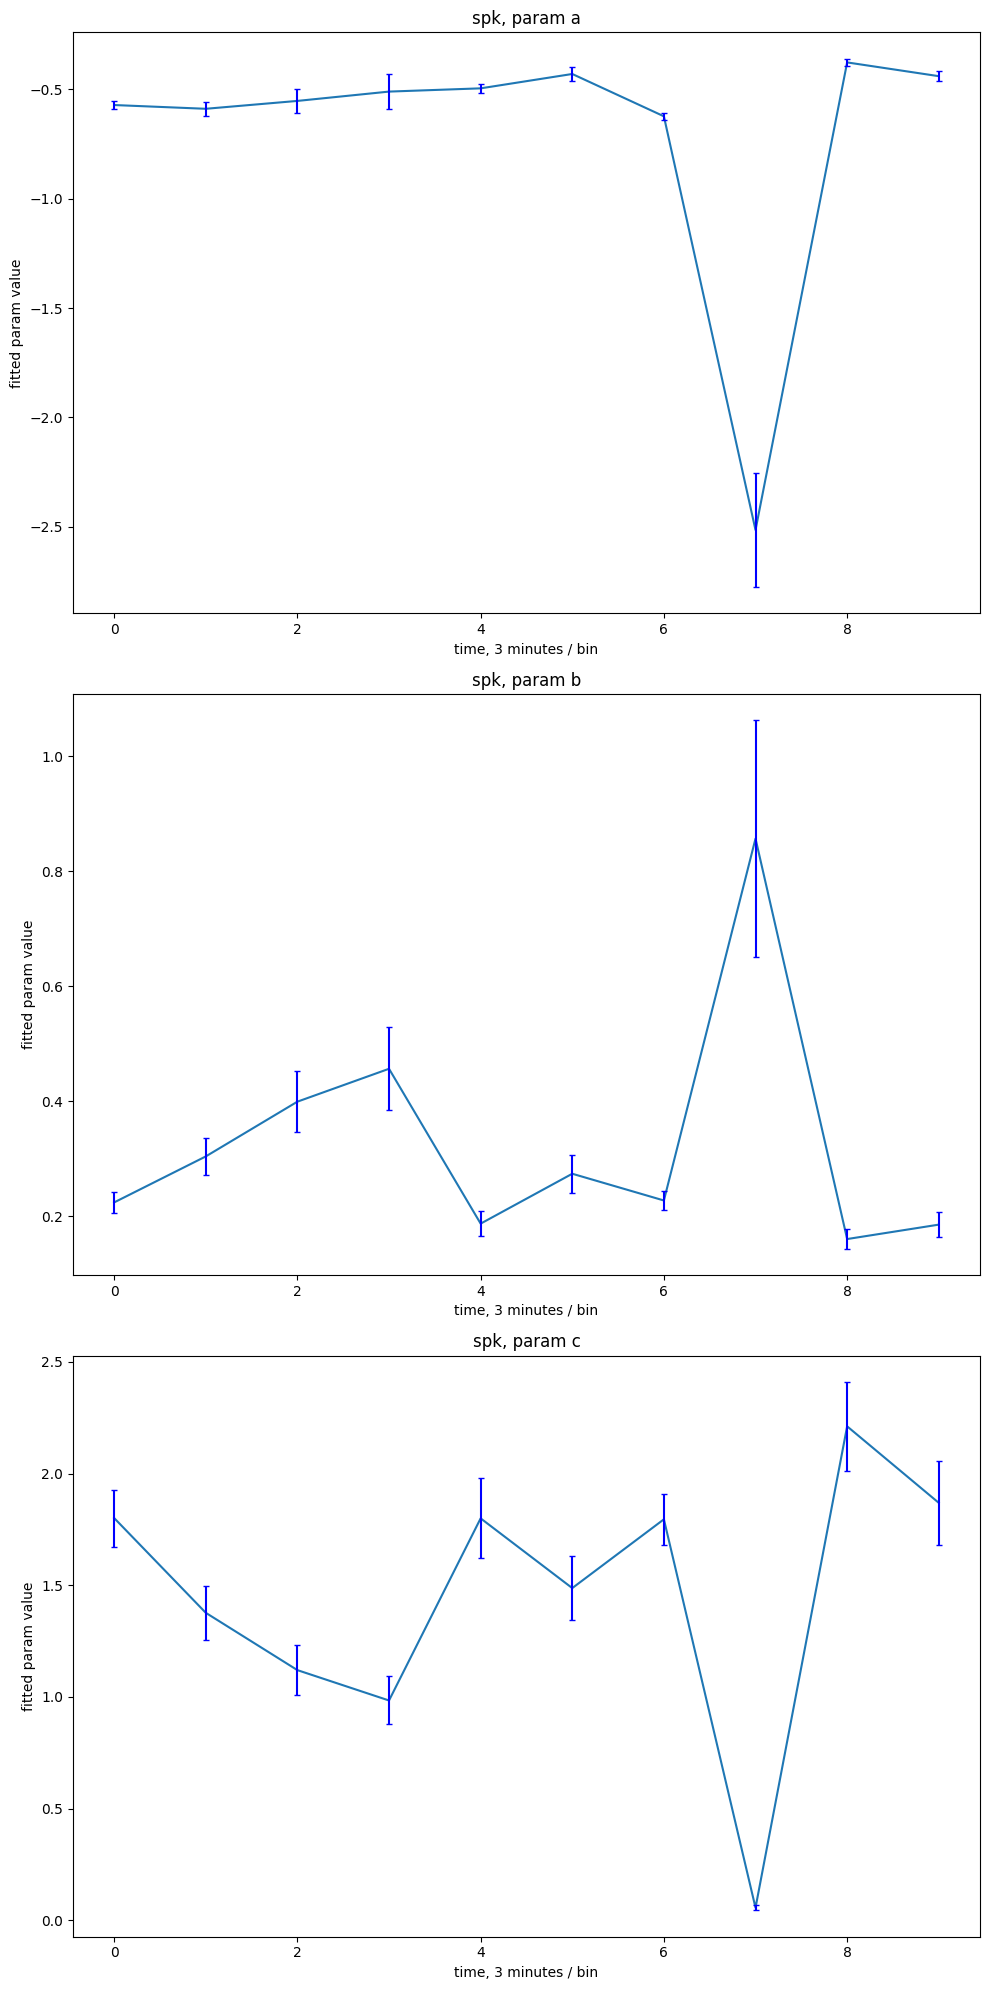

0.94107753


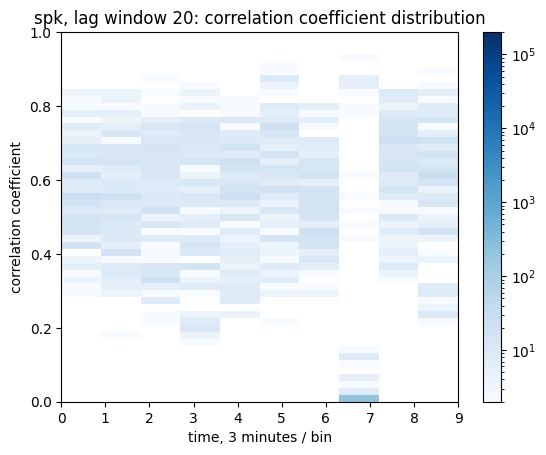

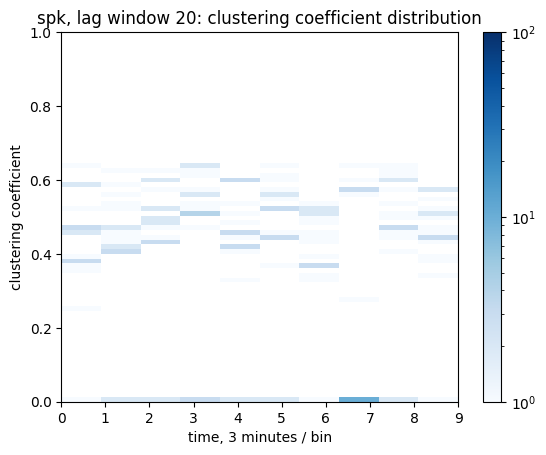

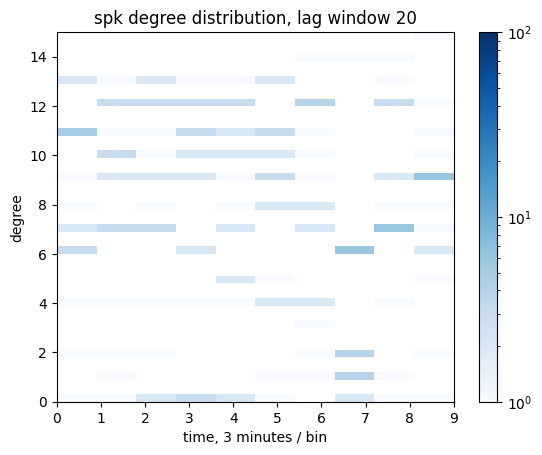

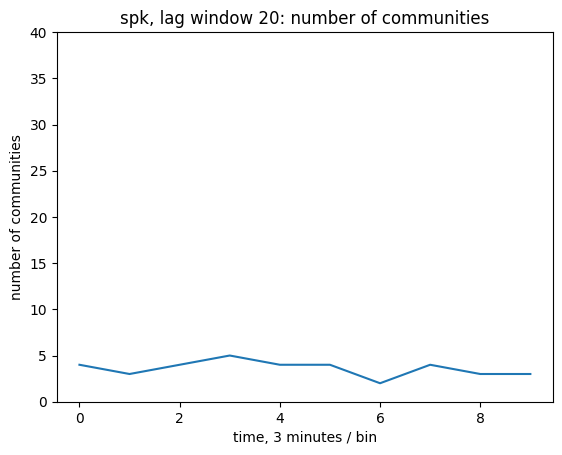

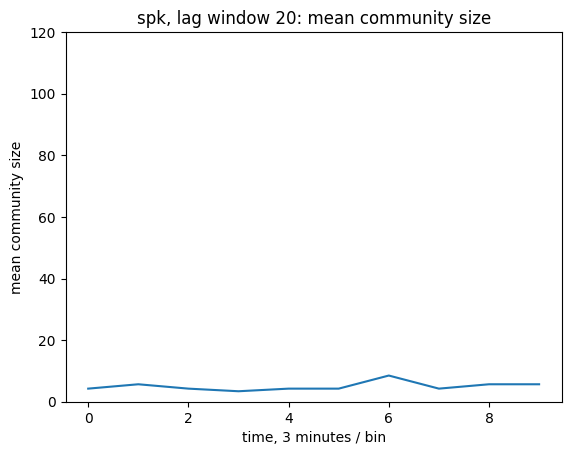

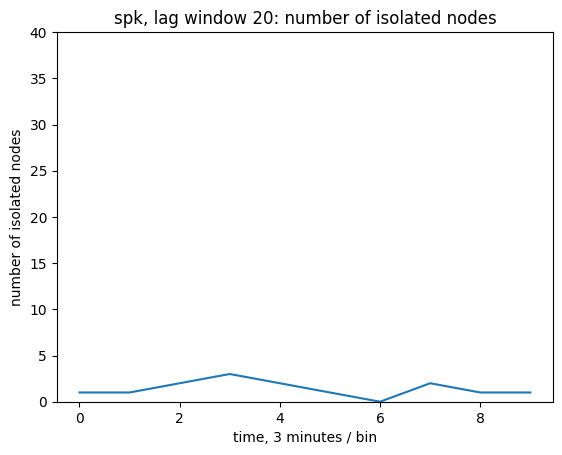

[[0.79730079 0.18988554 0.49874392]
 [0.18988554 0.04585062 0.11735124]
 [0.49874392 0.11735124 0.31583358]]


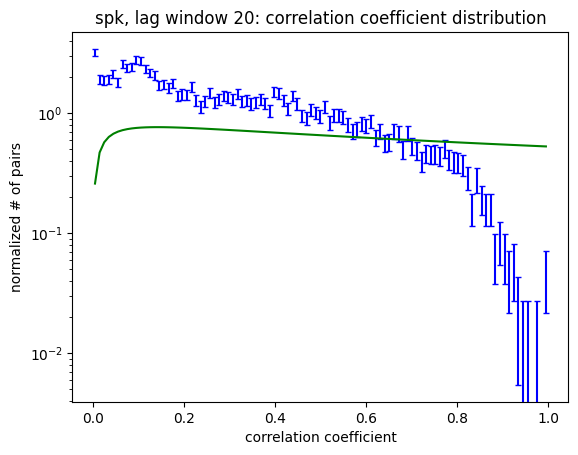

Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Optimal parameters not found: Number of calls to function has reached maxfev = 800.
Optimal parameters not found: Number of calls to function has reached maxfev = 800.


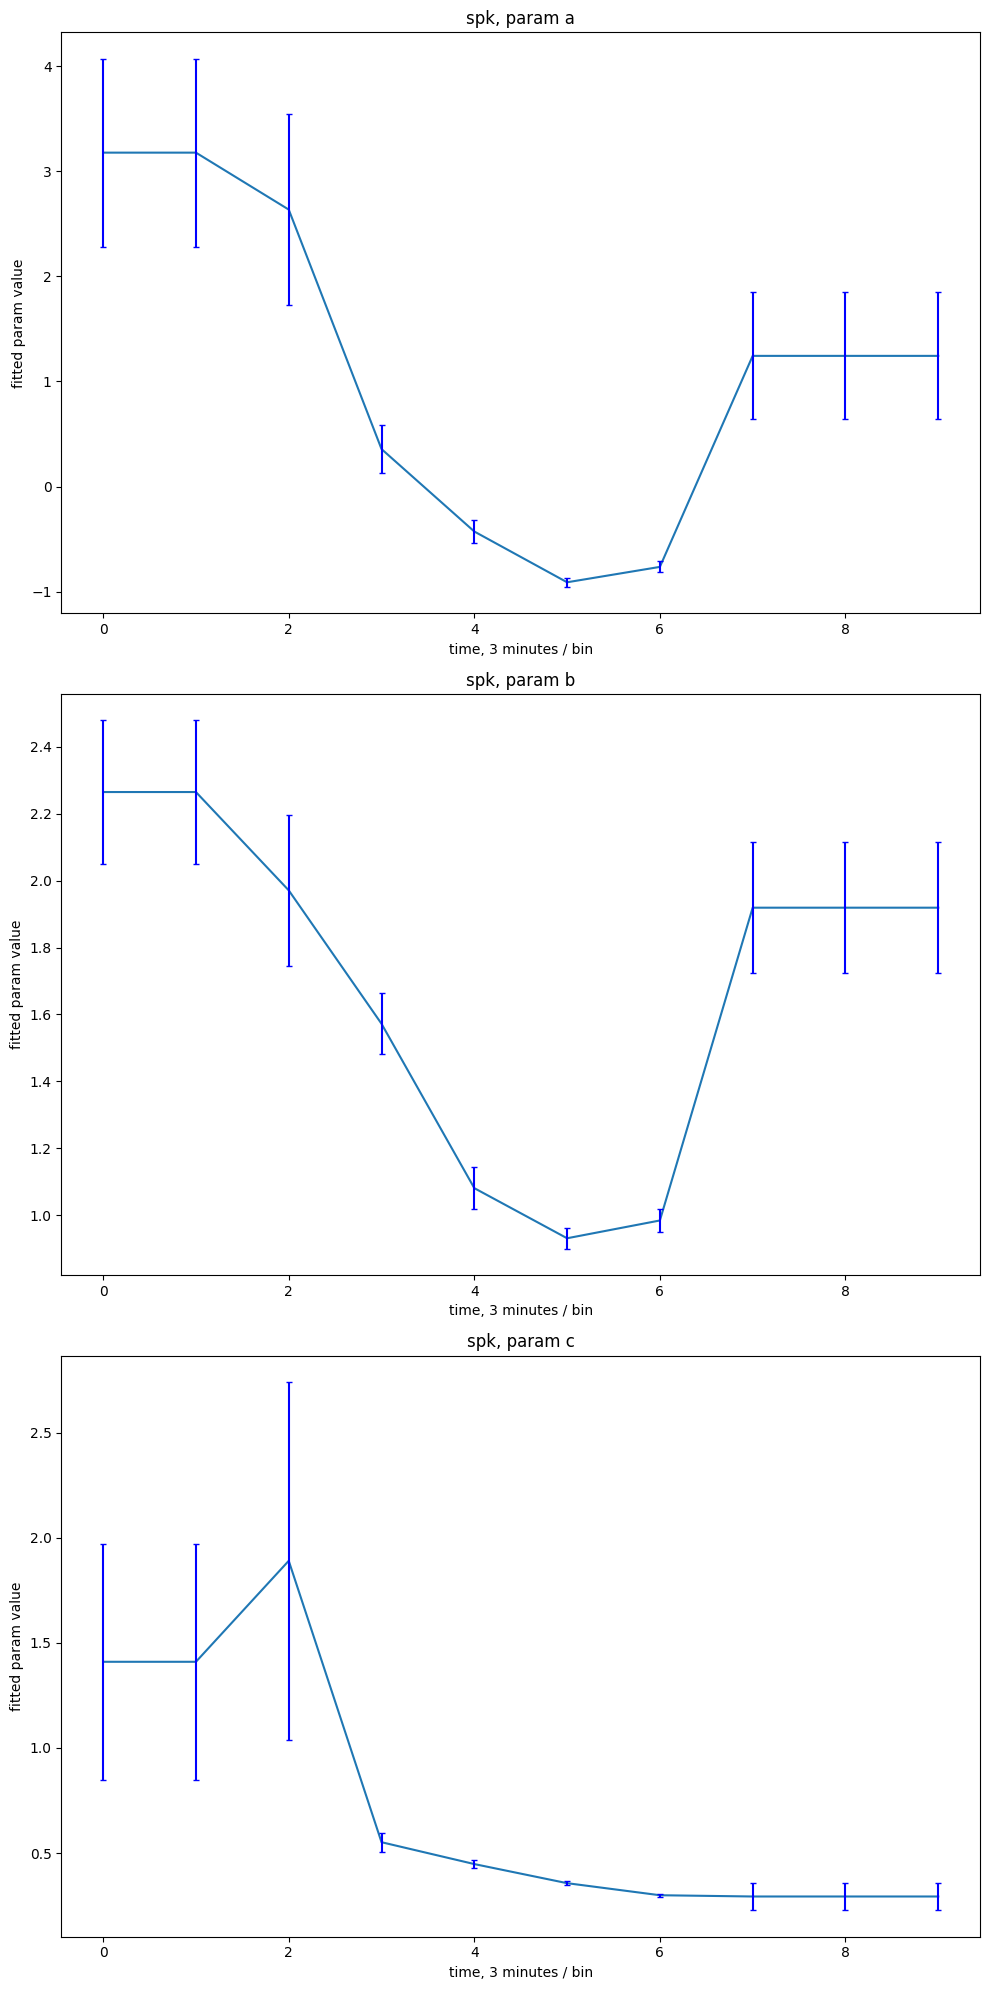

1.0000002


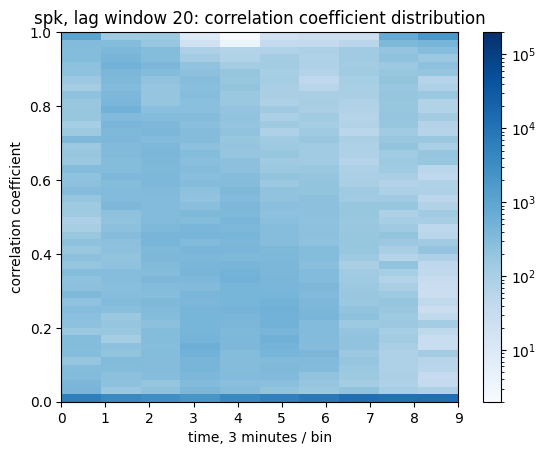

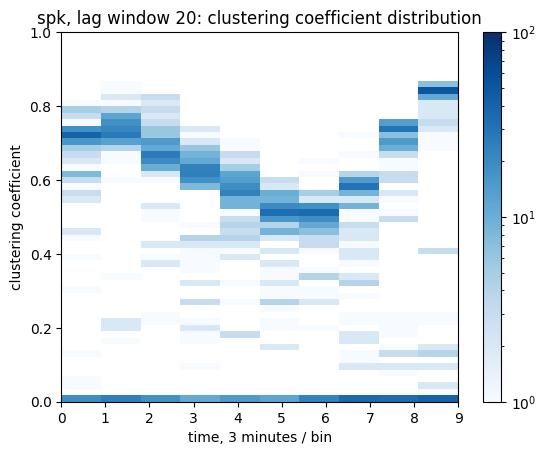

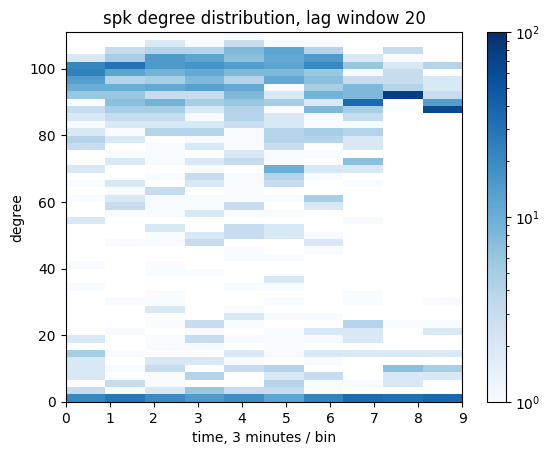

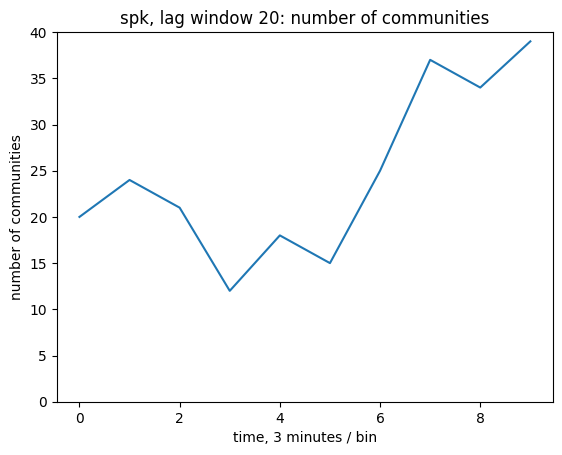

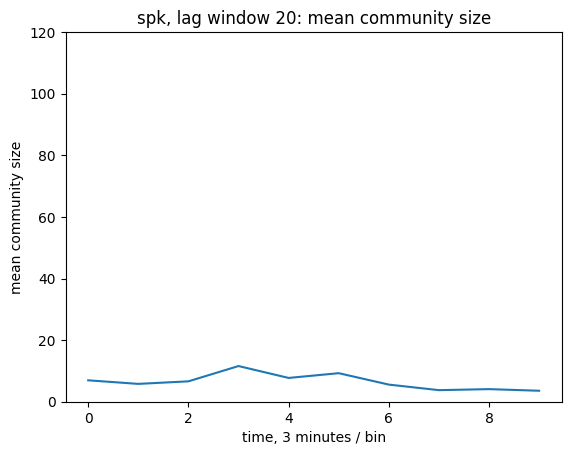

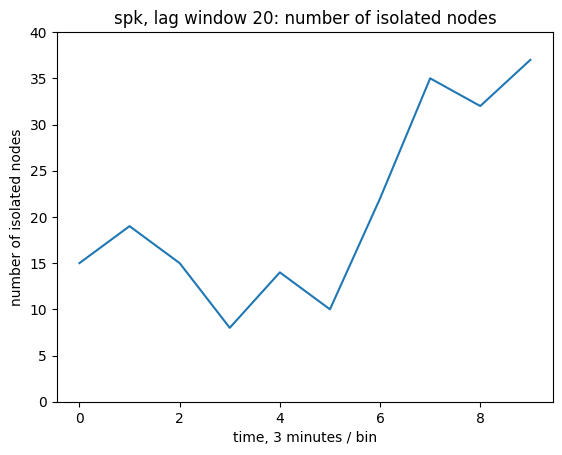

[[ 7.87733613e-04  4.18812610e-04  2.62111598e-05]
 [ 4.18812610e-04  5.30335517e-04 -1.55749471e-04]
 [ 2.62111598e-05 -1.55749471e-04  2.76029837e-04]]


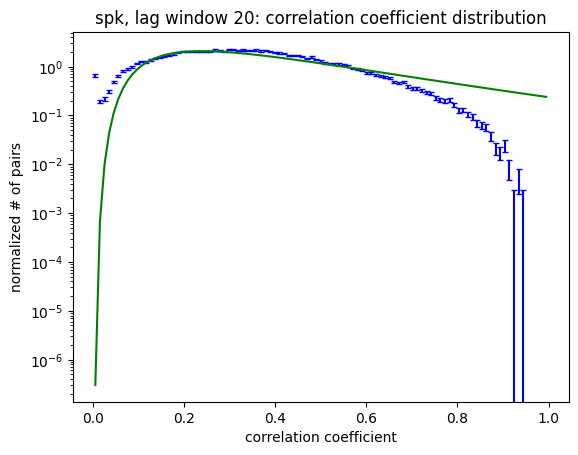

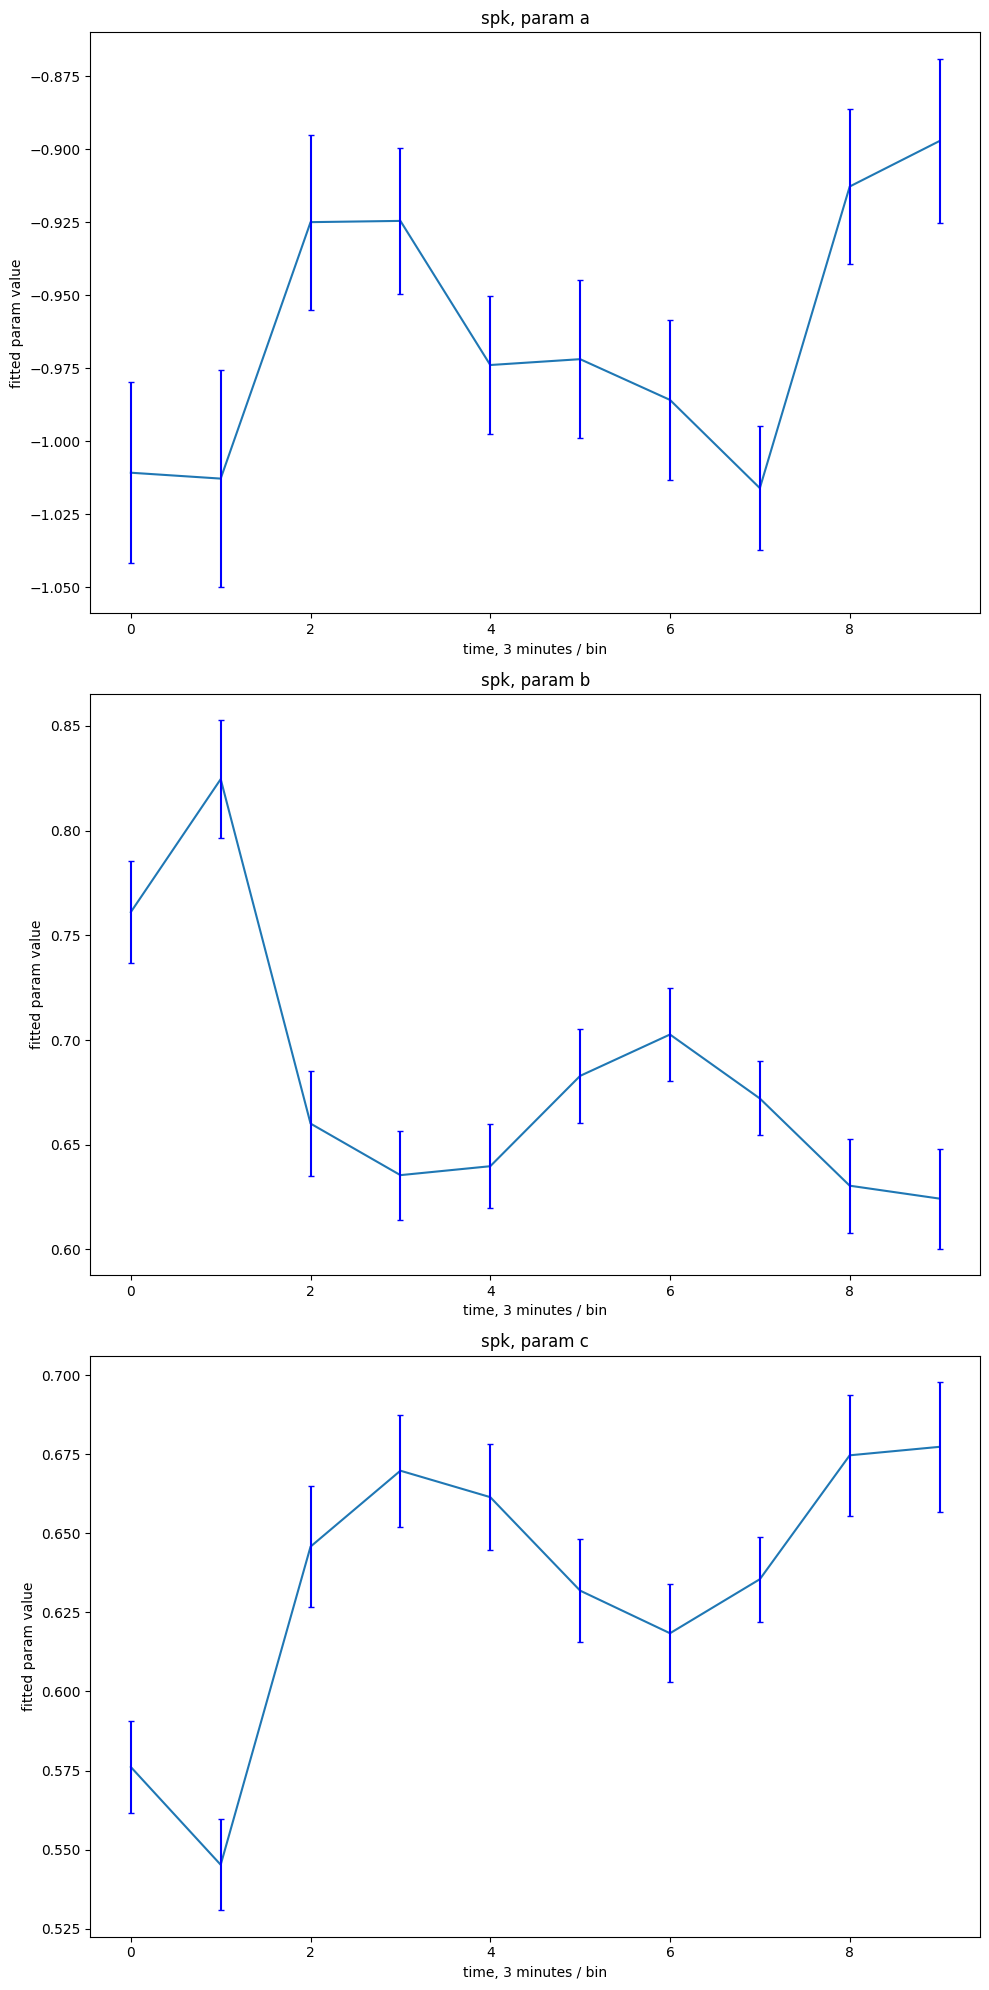

0.96094286


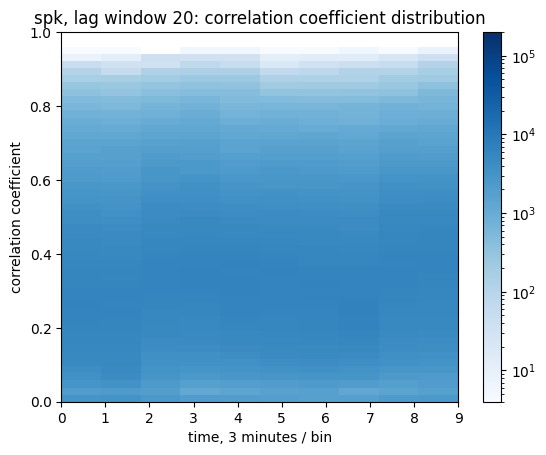

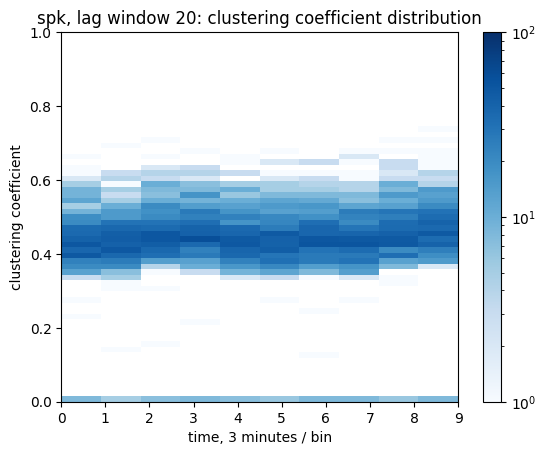

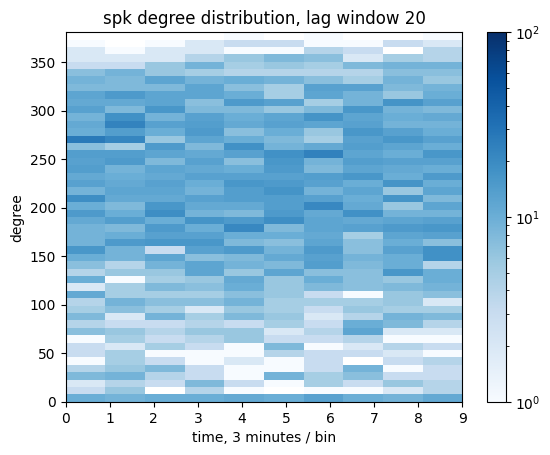

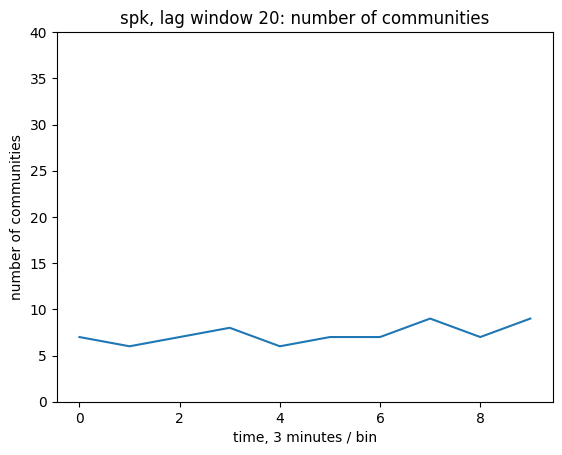

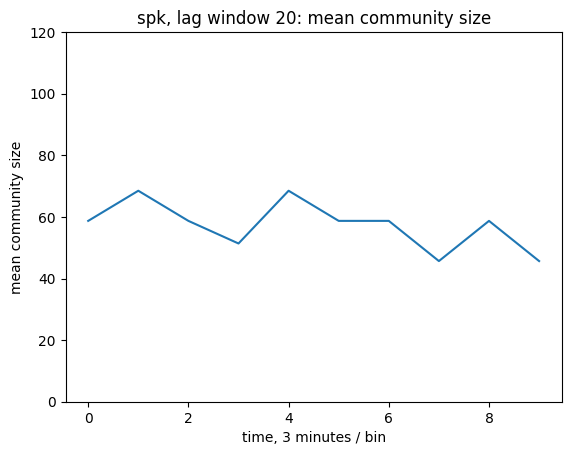

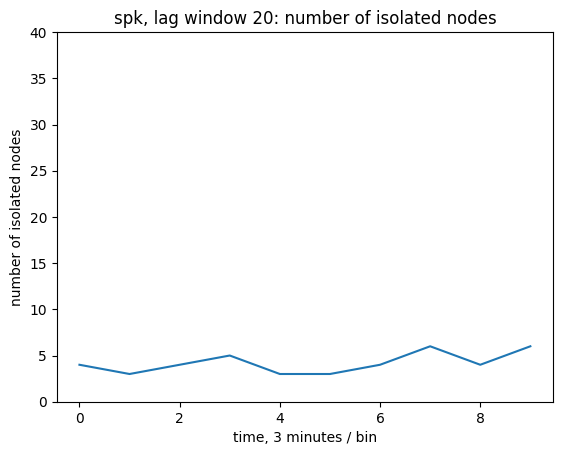

[[0.0056098  0.00313093 0.00089194]
 [0.00313093 0.00228802 0.00018955]
 [0.00089194 0.00018955 0.00068297]]


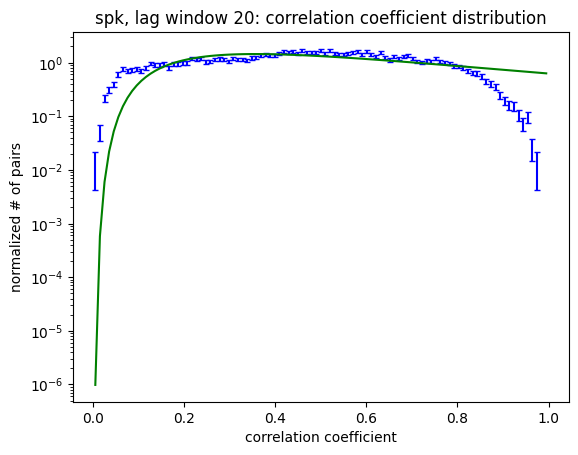

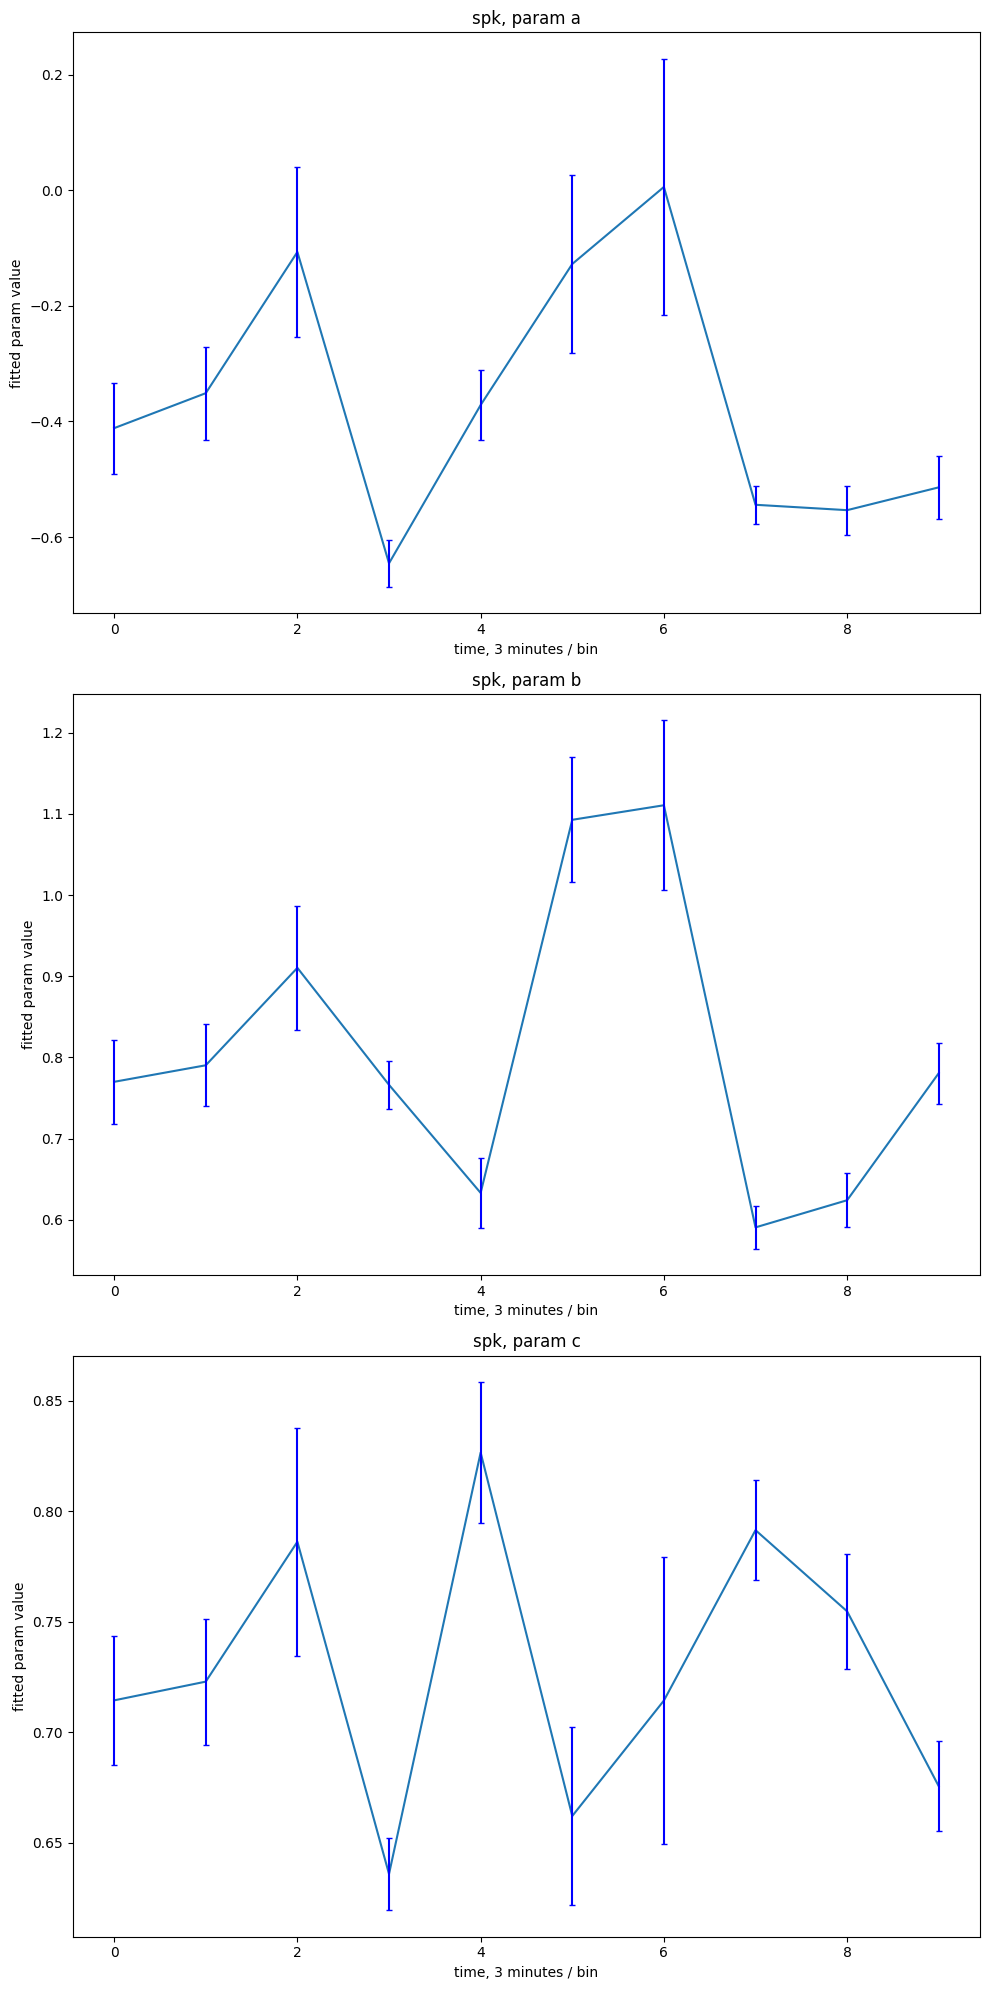

0.99315447


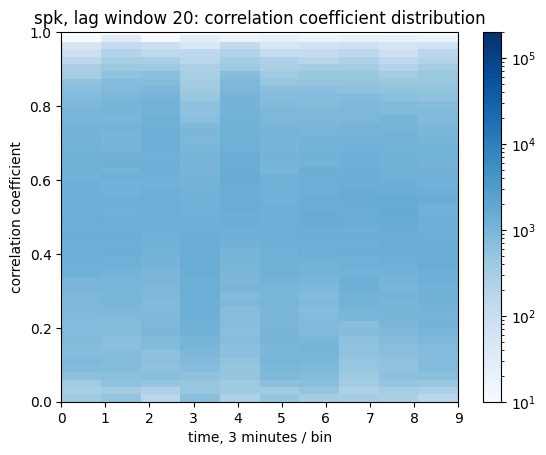

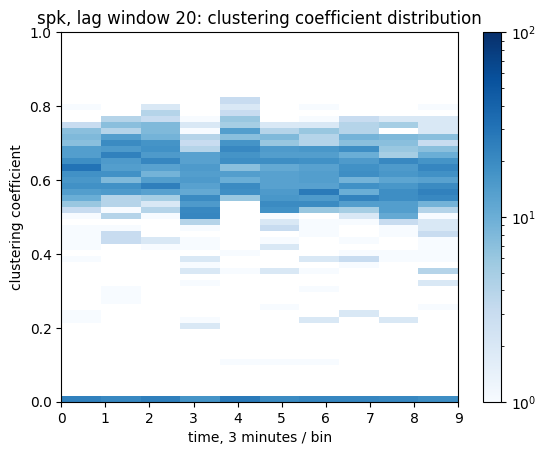

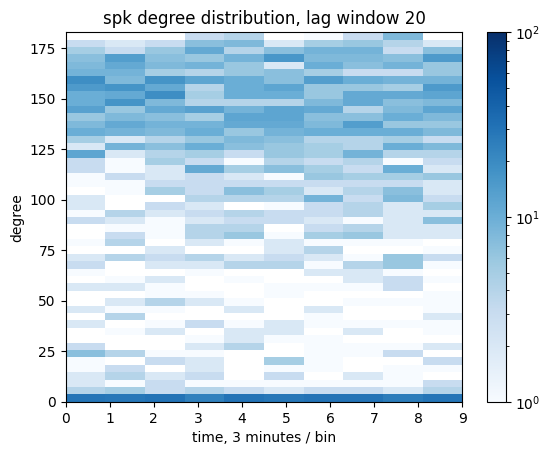

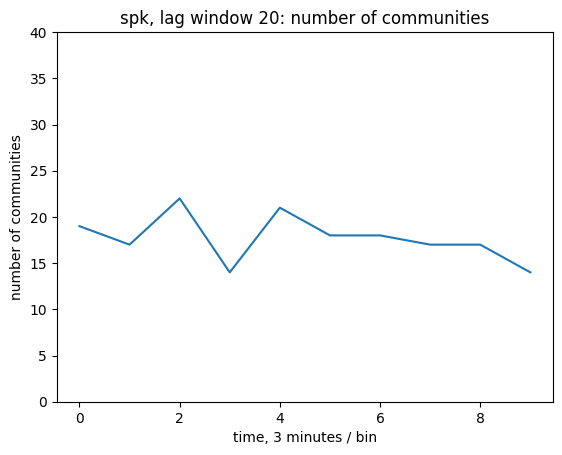

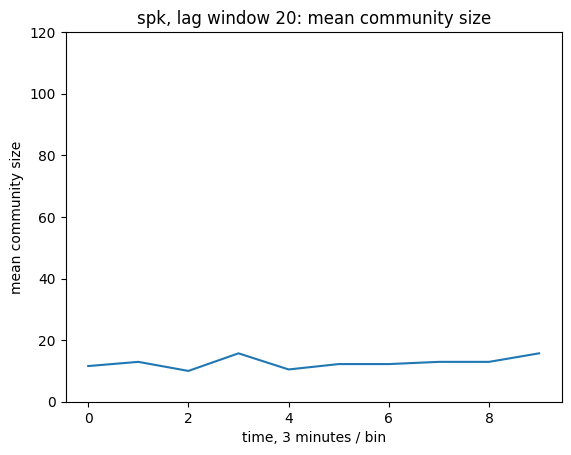

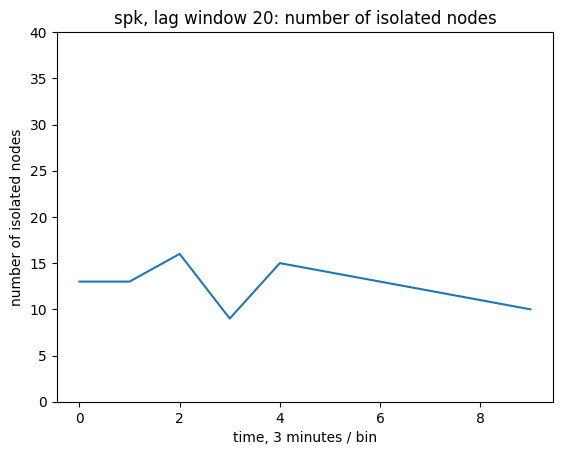

[[ 4.23326977e-04  2.29466638e-04 -4.97228765e-05]
 [ 2.29466638e-04  3.77660719e-04 -4.00044446e-04]
 [-4.97228765e-05 -4.00044446e-04  1.67511999e-03]]


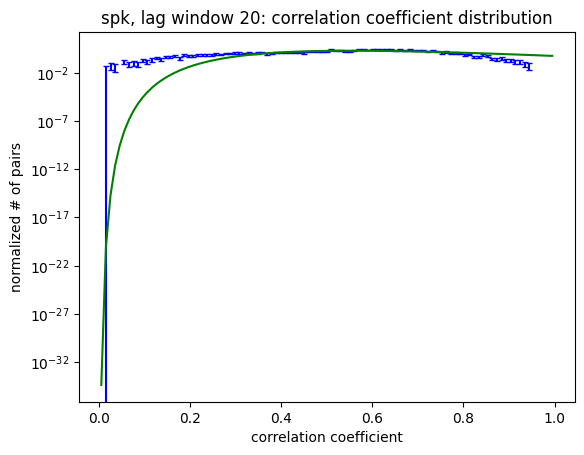

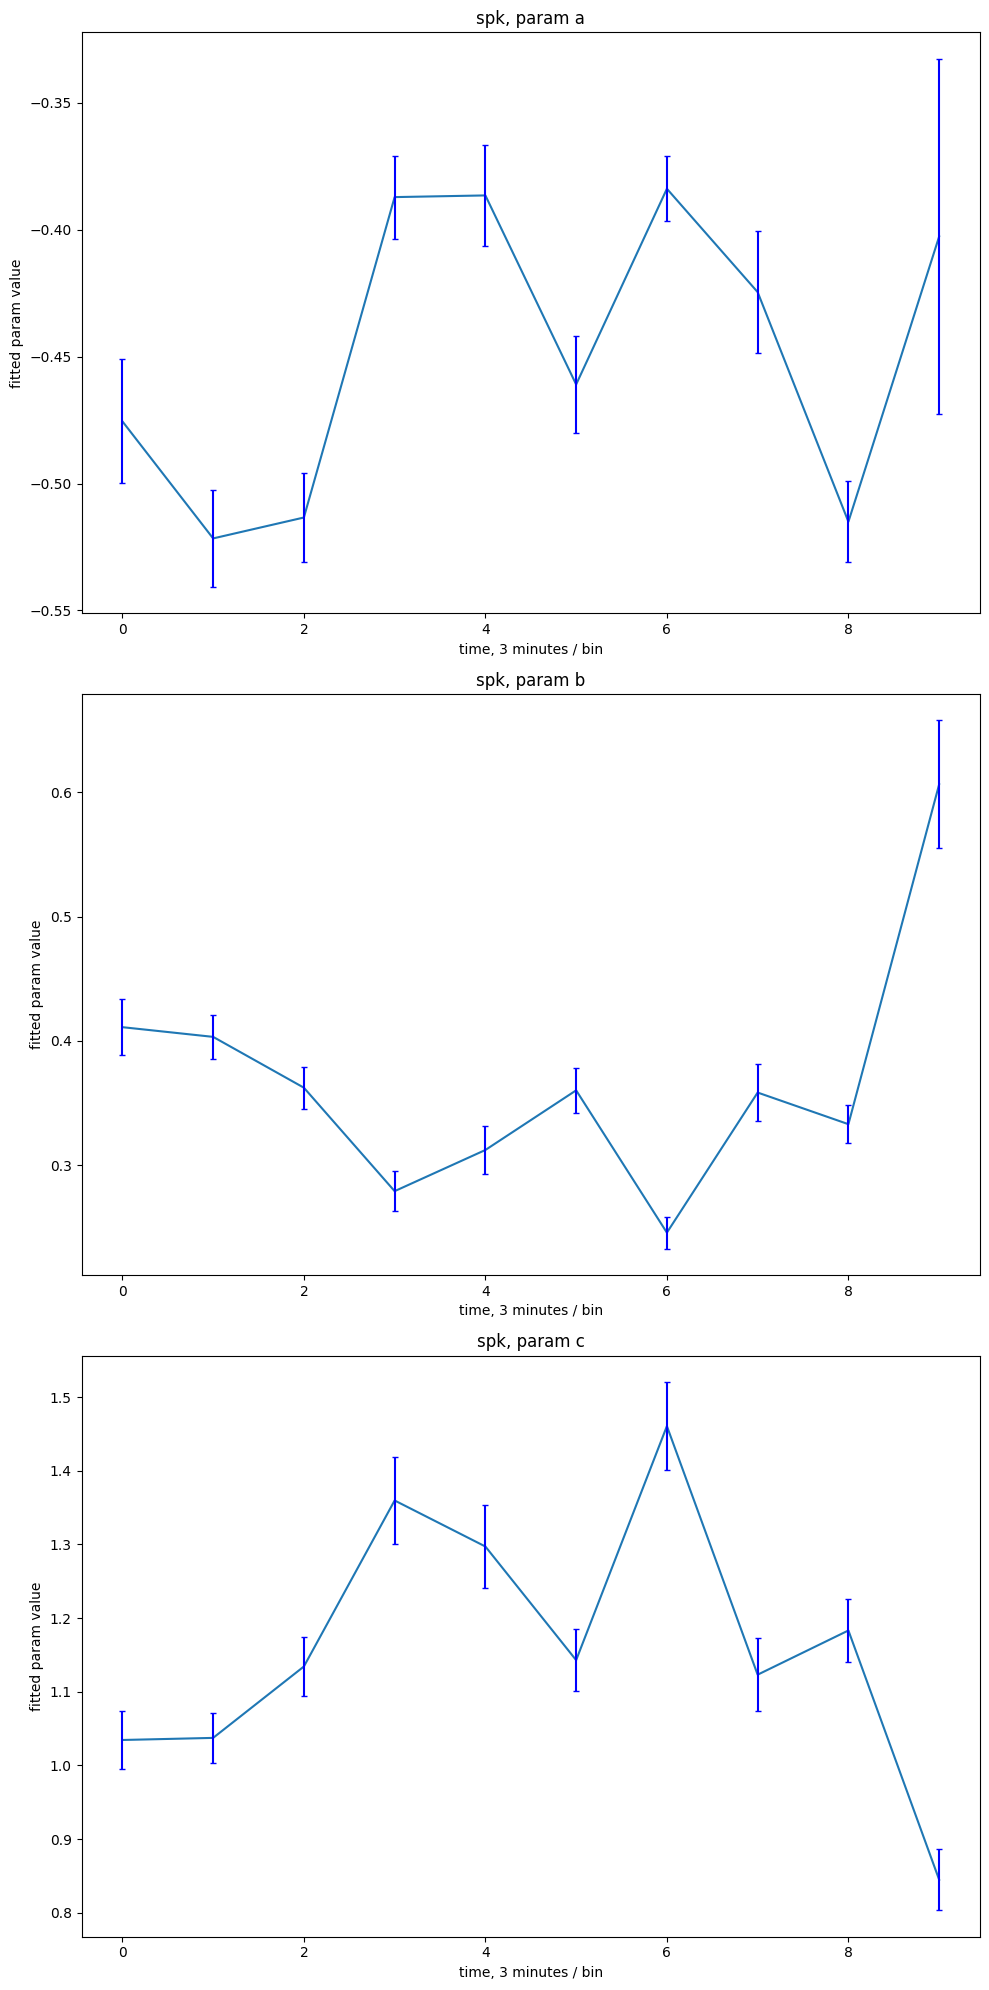

0.984322


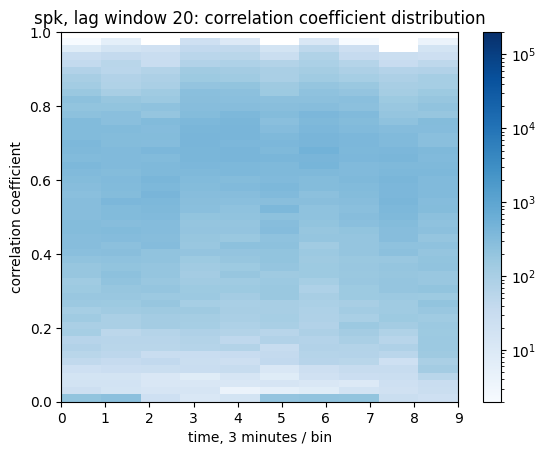

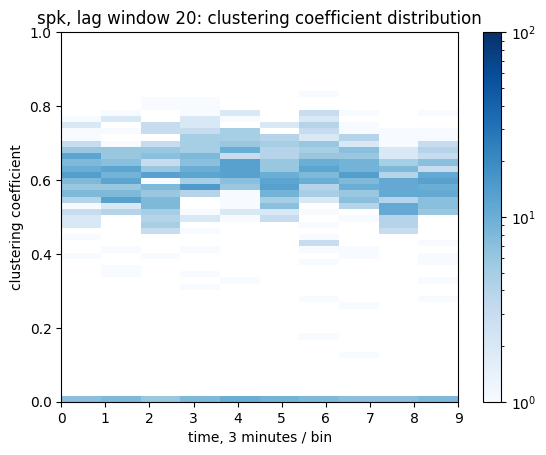

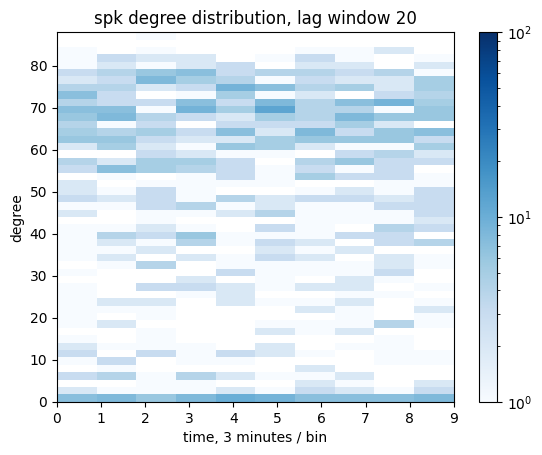

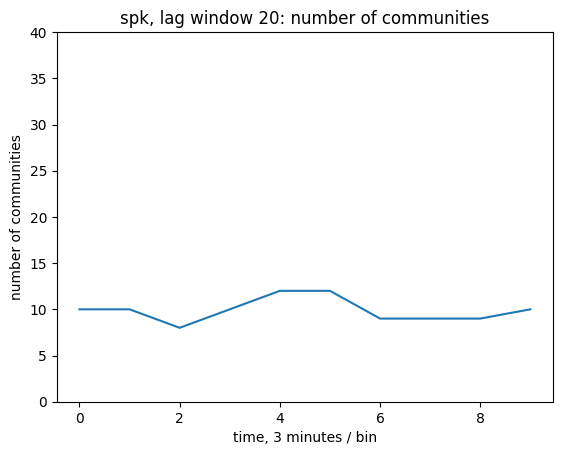

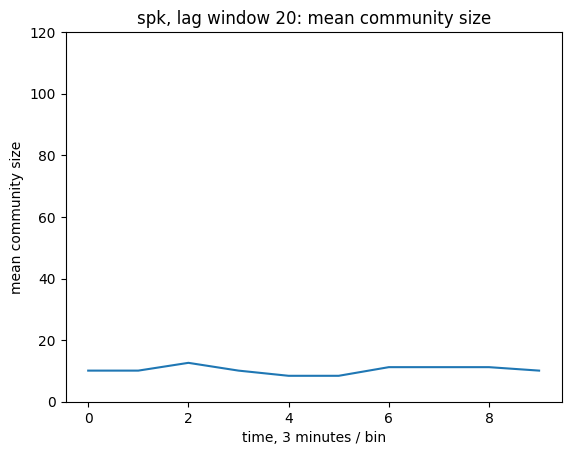

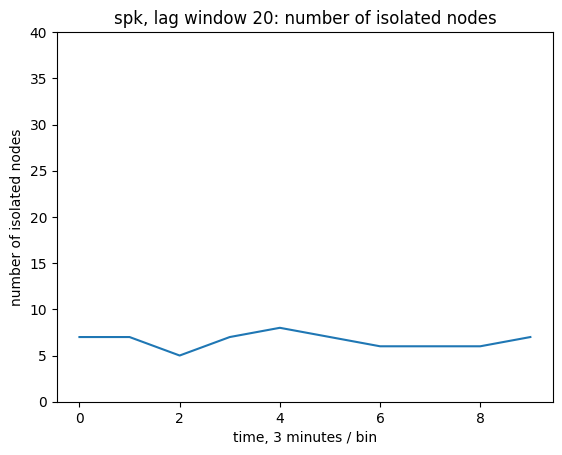

[[0.00843037 0.00437876 0.00200294]
 [0.00437876 0.00272711 0.00075011]
 [0.00200294 0.00075011 0.00101311]]


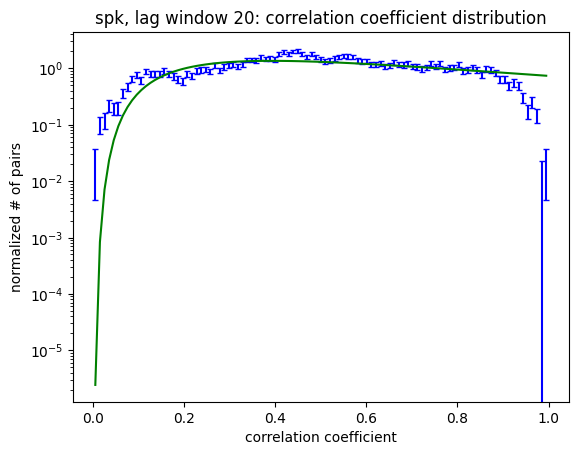

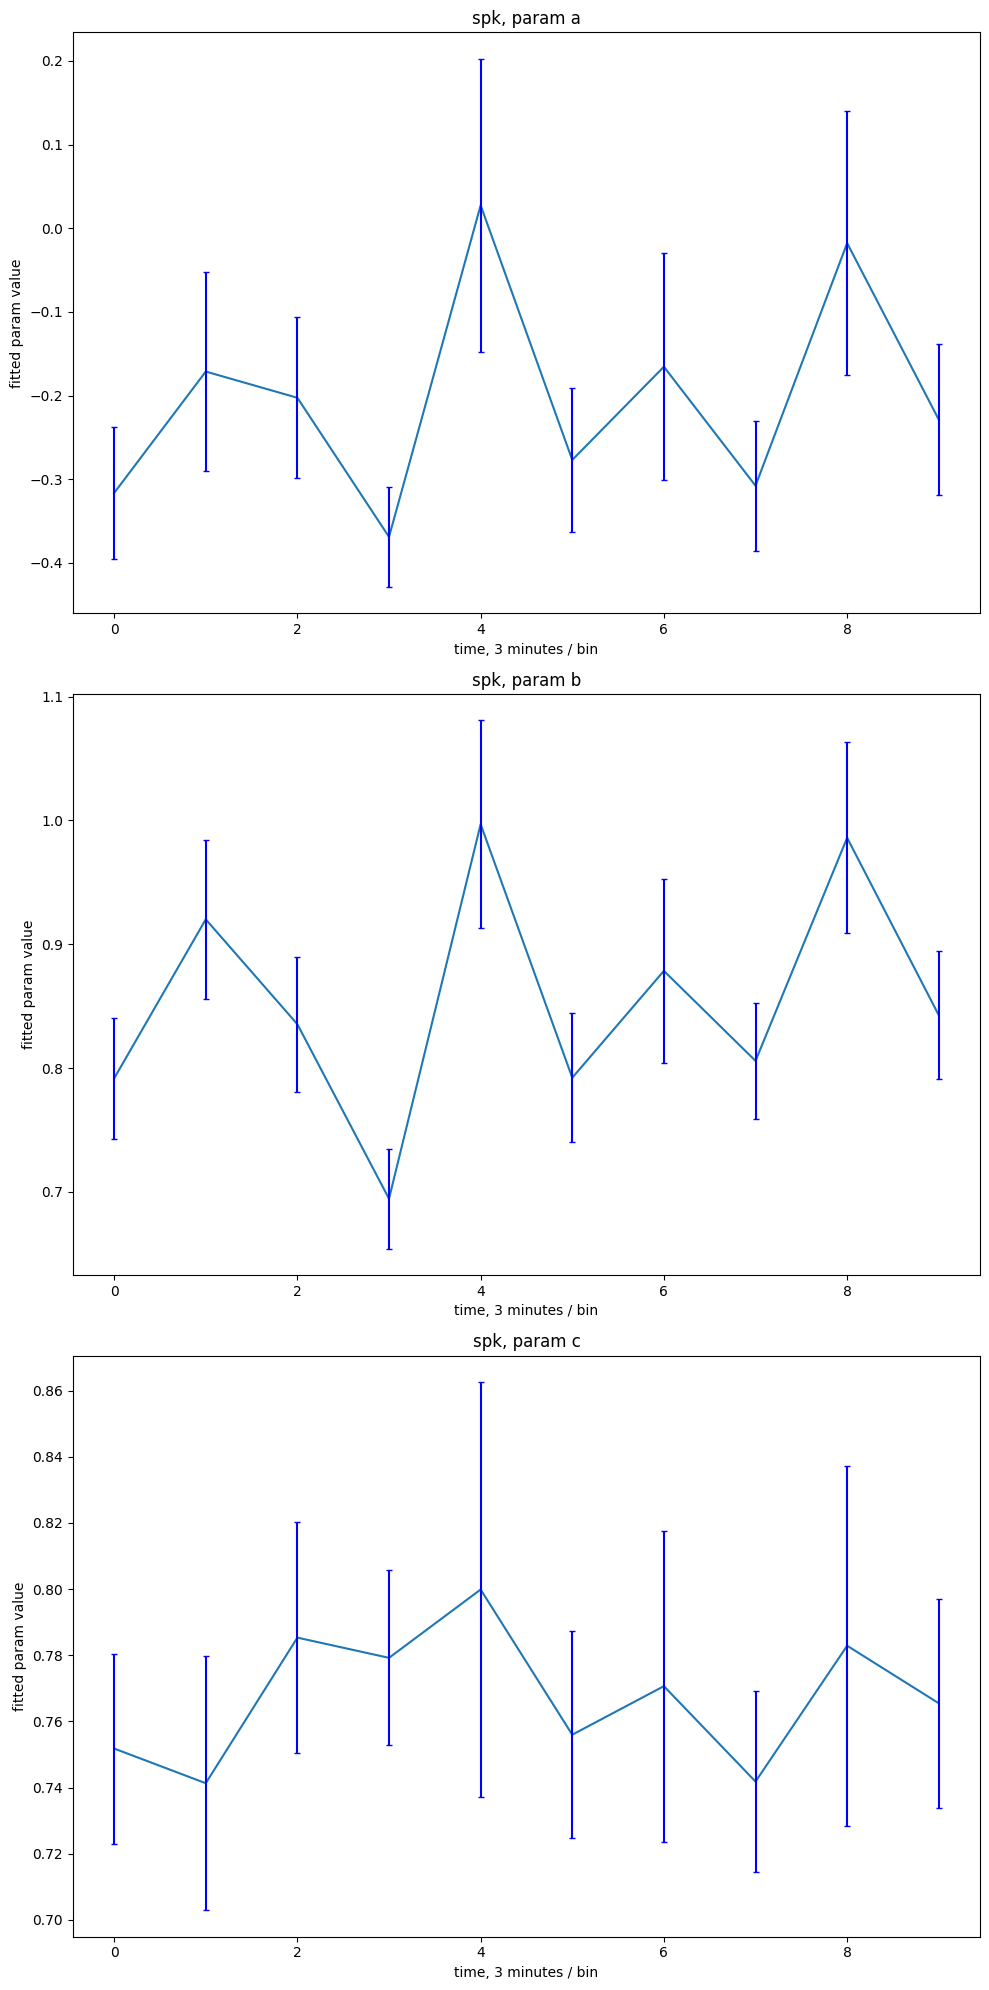

0.99862385


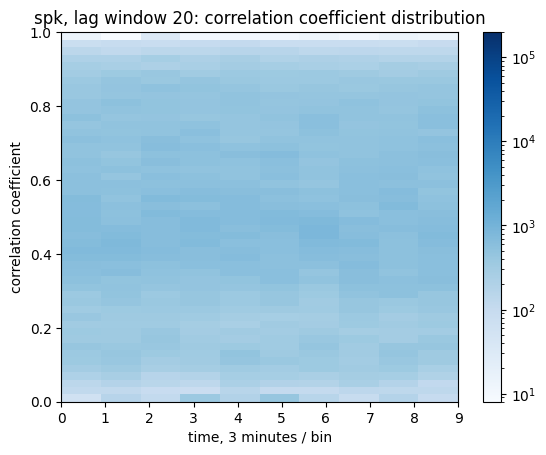

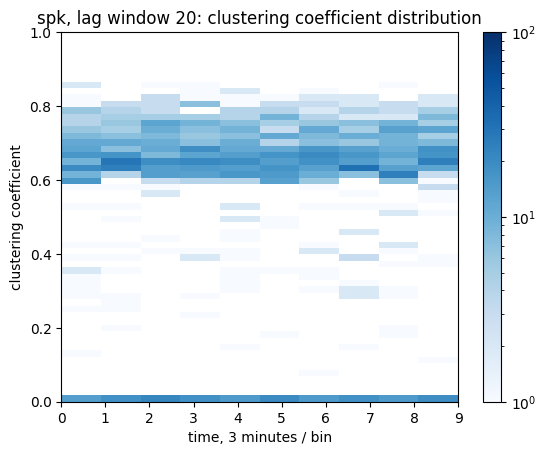

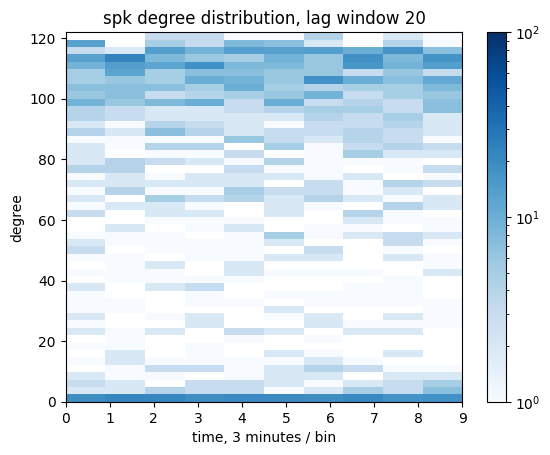

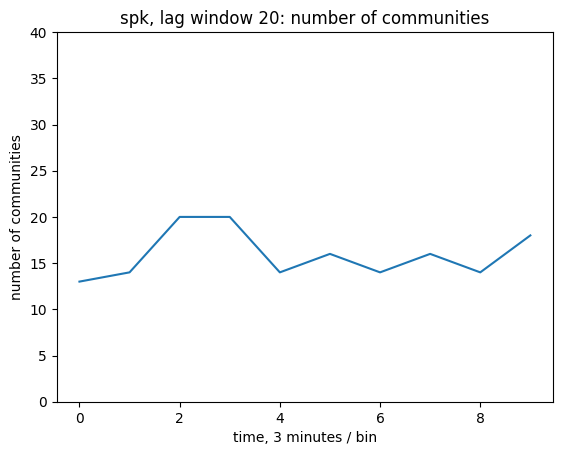

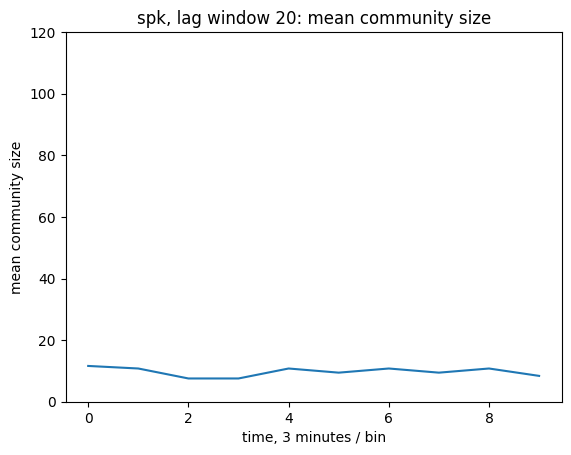

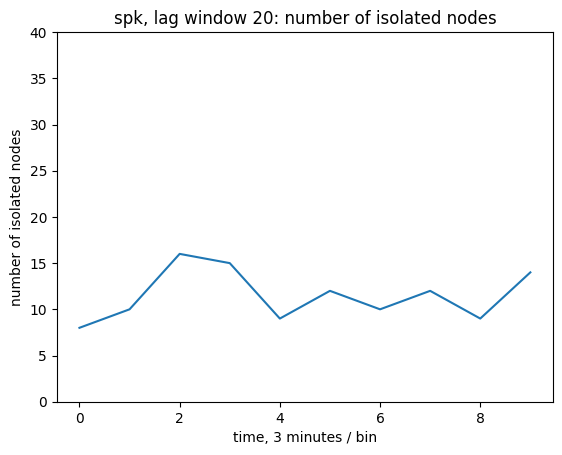

[[0.62939983 0.24096569 0.05705148]
 [0.24096569 0.09508812 0.02101575]
 [0.05705148 0.02101575 0.00550693]]


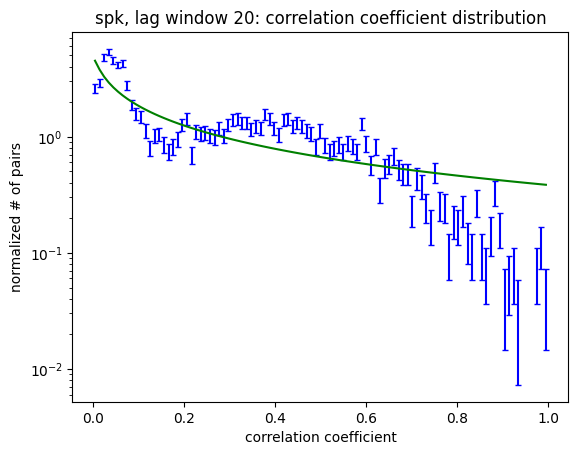

Optimal parameters not found: Number of calls to function has reached maxfev = 800.


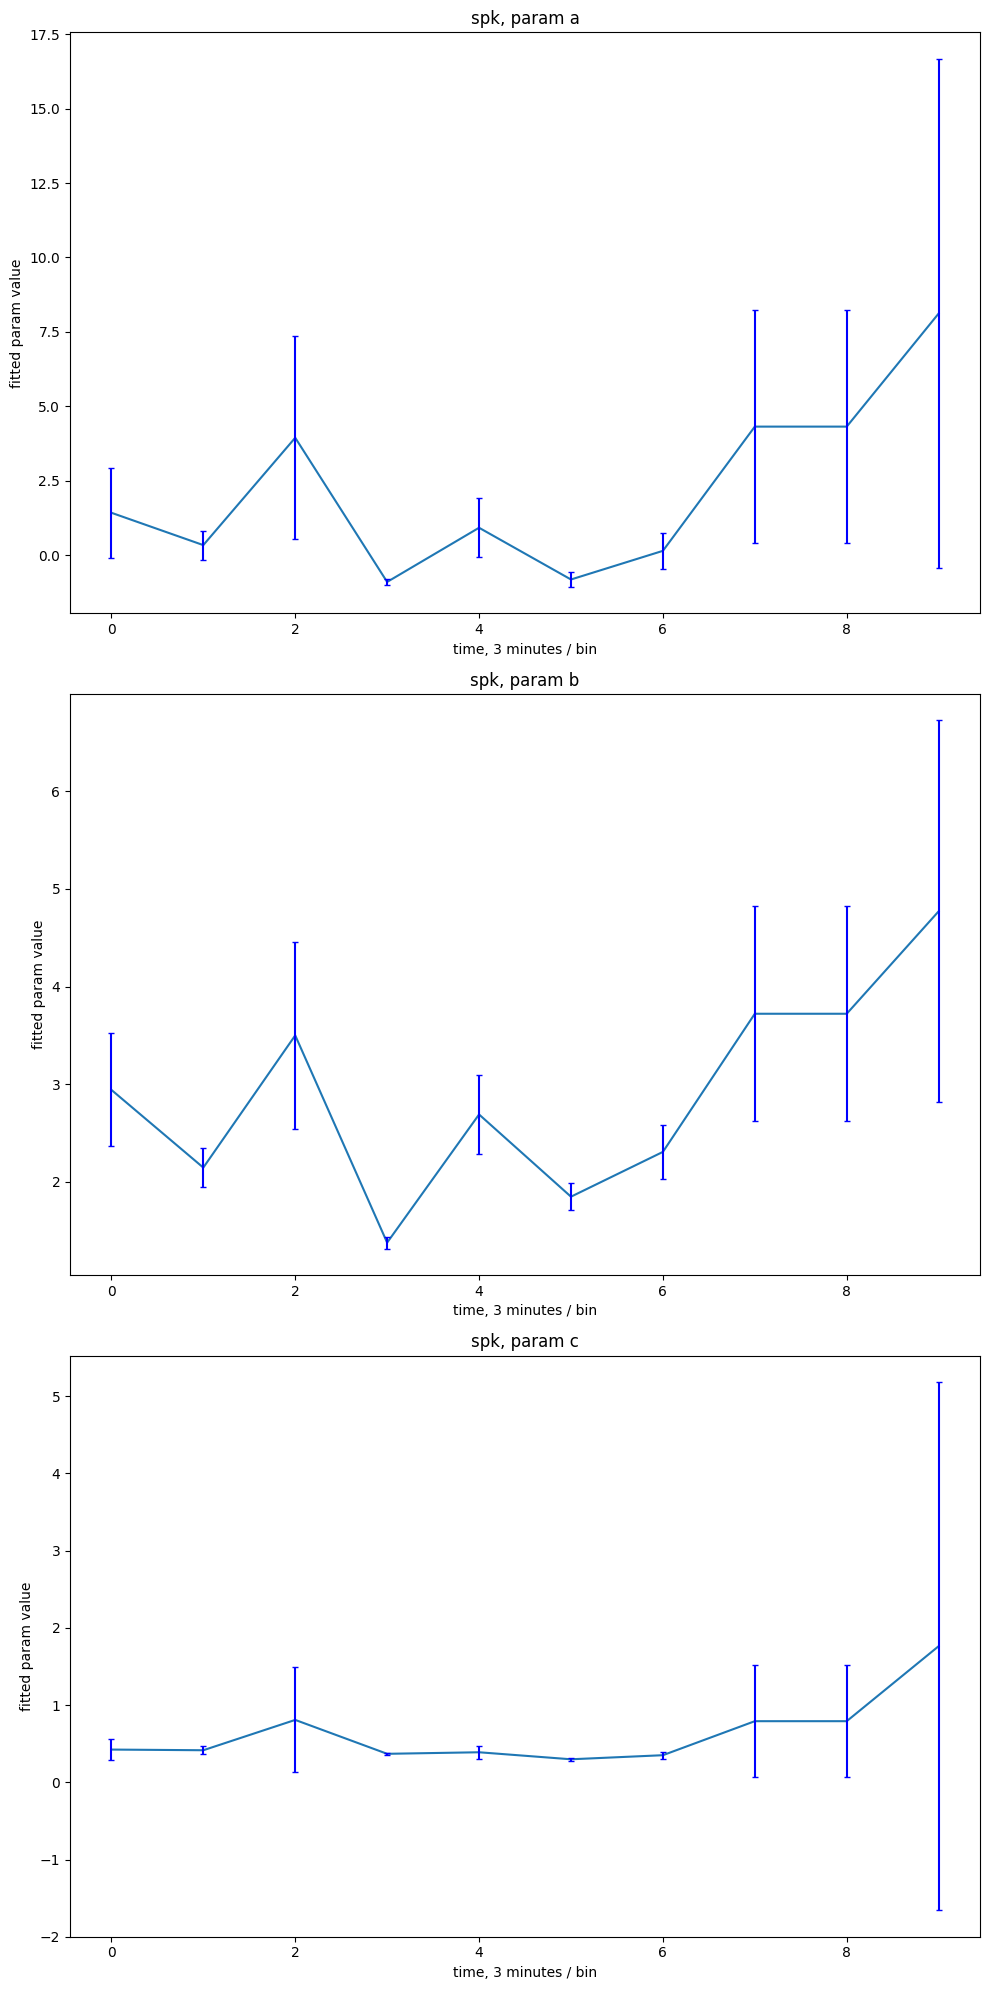

0.9999921


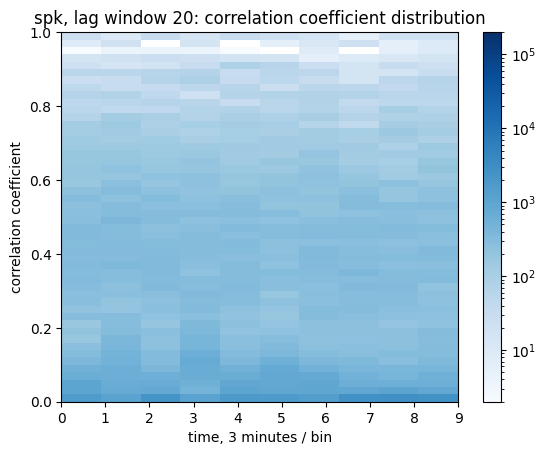

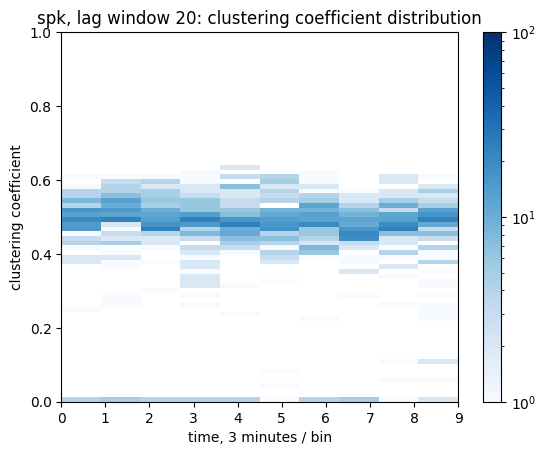

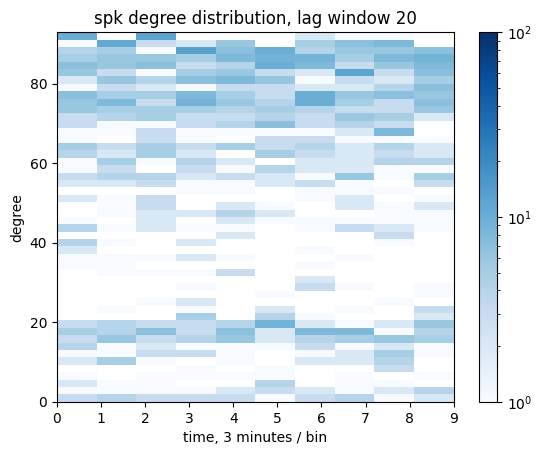

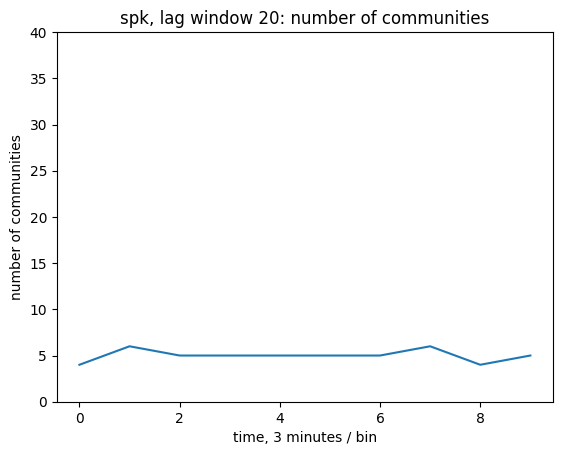

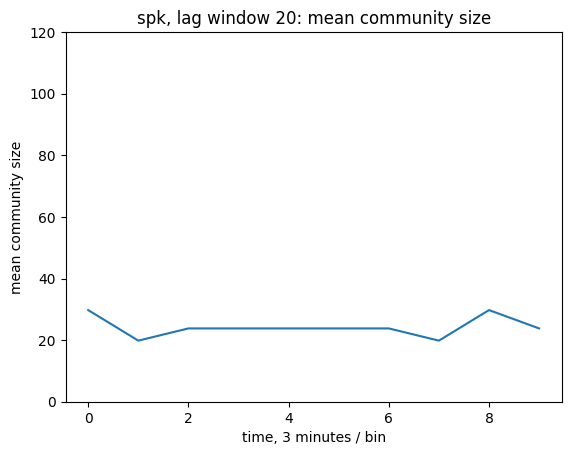

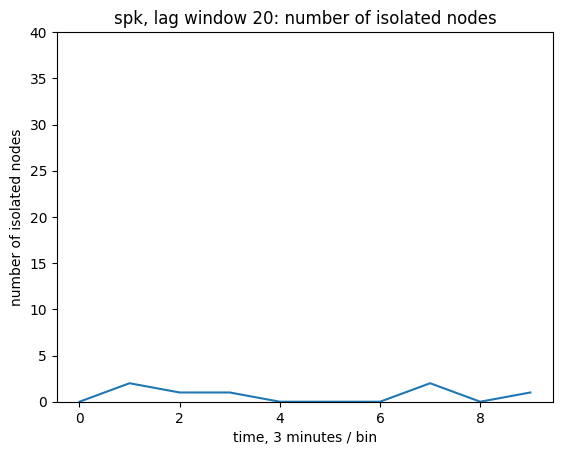

In [4]:
from scipy.stats import binom, linregress
from scipy.optimize import curve_fit
import matplotlib as mpl
from cdlib import algorithms

# def curve(x, a, b, c):
#     return c * x**(a - 1) * np.exp(-b * x)

# def curve(x, a, b, c):
#     return c * x**(a - 1) * (1-x)**(b-1)

def curve(x, a, b, c):
    return c * np.exp(-(np.log(x) - a)**2 / b**2 / 2) / x

for lag in [10, 20]:
    for fn in ALL_FILES:
        with open(f'processed/{fn}_lag_window_{lag}.pkl', 'rb') as f:
            data = pickle.load(f)
            data_all, data = data['all'], data['slices']
        fn = fn.split('_')[2]
        # with open(f'processed/{fn}_lag_window_{lag}_shuffle.pkl', 'rb') as f:
        #     data_rnd = pickle.load(f)
        bins = np.linspace(0.0, 1.0, 100)
        histograms = np.array([np.histogram(d['corr'][abs(d['corr_idx_data']) > 2], bins=bins, density=True)[0] for d in data])
        mean_hist = (np.quantile(histograms, 0.95, 0) + np.quantile(histograms, 0.05, 0)) / 2.0
        stderr_hist = (np.quantile(histograms, 0.95, 0) - np.quantile(histograms, 0.05, 0)) / 2.0

        h0 = np.histogram(data_all['corr'][abs(data[0]['corr_idx_data']) > 2], bins=bins)[0]
        n = np.sum(abs(data_all['corr_idx_data']) > 2)
        distr = binom(n, h0 / n)
        lb, ub = distr.ppf(0.05), distr.ppf(0.95)
        mean_hist = h0 / n / np.diff(bins)
        stderr_hist = ((h0 - lb) / n / np.diff(bins), (ub - h0) / n / np.diff(bins))
        # , sigma=np.std(histograms, 0)[1:], absolute_sigma=True
        (a, b, c), pcov = curve_fit(curve, (bins[:-1] + np.diff(bins) / 2)[1:], np.mean(histograms, 0)[1:])
        print(pcov)
        # xs, ys = (bins[:-1] + np.diff(bins) / 2)[len(bins) // 2:], np.log(np.mean(histograms, 0))[len(bins) // 2:]
        # slope, intercept, r_value, p_value, std_err = linregress(xs, ys)

        # plt.bar(bins[:-1], mean_hist, width=np.diff(bins), align='edge', edgecolor='black', alpha=0.7)
        plt.errorbar(bins[:-1] + np.diff(bins) / 2, mean_hist, yerr=stderr_hist, fmt='none', ecolor='blue', capsize=2)
        plt.plot(bins[:-1] + np.diff(bins) / 2, curve(bins[:-1] + np.diff(bins) / 2, a, b, c), 'g-')
        # plt.plot(bins[:-1] + np.diff(bins) / 2, np.exp(slope * (bins[:-1] + np.diff(bins) / 2) + intercept), 'b-')
        # plt.hist(data['corr'][corr_mask], bins=bins)
        plt.title(f'{fn}, lag window {lag}: correlation coefficient distribution')
        plt.xlabel('correlation coefficient')
        plt.ylabel('normalized # of pairs')
        plt.yscale('log')
        plt.savefig(f'plots/{fn}_lag_window_{lag}.png')
        # print()
        plt.show()

        params = []
        param_errors = []
        for i in range(histograms.shape[0]):
            try:
                (a, b, c), pcov = curve_fit(curve, (bins[:-1] + np.diff(bins) / 2)[1:], histograms[i][1:])
            except Exception as e:
                print(e)
            params.append((a, b, c))
            param_errors.append(np.sqrt(np.diag(pcov)))
        plt.figure(figsize=(10, 20))
        for i in range(3):
            plt.subplot(3, 1, i + 1)
            plt.plot([p[i] for p in params])
            plt.errorbar(range(len(params)), [p[i] for p in params], yerr=[p[i] for p in param_errors], fmt='none', ecolor='blue', capsize=2)
            plt.title(f'{fn}, param {"abc"[i]}')
            plt.xlabel('time, 3 minutes / bin')
            plt.ylabel('fitted param value')
        plt.tight_layout()
        plt.savefig(f'plots/{fn}_lag_window_{lag}_params.png')
        plt.show()

        xs, ys = zip(*[(c, i) for i in range(len(data)) for c in data[i]['corr'][abs(data[i]['corr_idx_data']) > 2]])
        print(max(xs))
        plt.hist2d(ys, xs, bins=(len(data), 50), cmap='Blues', norm=mpl.colors.LogNorm(vmax=200000))
        plt.title(f'{fn}, lag window {lag}: correlation coefficient distribution')
        plt.ylim(0, 1)
        plt.xlabel('time, 3 minutes / bin')
        plt.ylabel('correlation coefficient')
        plt.colorbar()
        plt.savefig(f'plots/{fn}_lag_window_{lag}_2d.png')
        plt.show()

        xs, ys = zip(*[(c, i) for i in range(len(data)) for c in data[i]['C']])
        plt.hist2d(ys, xs, bins=(len(data), 50), cmap='Blues', norm=mpl.colors.LogNorm(vmax=100))
        plt.title(f'{fn}, lag window {lag}: clustering coefficient distribution')
        plt.ylim(0, 1)
        plt.xlabel('time, 3 minutes / bin')
        plt.ylabel('clustering coefficient')
        plt.colorbar()
        plt.savefig(f'plots/{fn}_lag_window_{lag}_2d_C.png')
        plt.show()

        xs, ys = zip(*[(c, i) for i in range(len(data)) for c in dict(data[i]['G'].degree()).values()])
        plt.hist2d(ys, xs, bins=(len(data), 50), cmap='Blues', norm=mpl.colors.LogNorm(vmax=100))
        plt.title(f'{fn} degree distribution, lag window {lag}')
        plt.xlabel('time, 3 minutes / bin')
        plt.ylabel('degree')
        plt.colorbar()
        plt.savefig(f'plots/{fn}_lag_window_{lag}_2d_degree.png')
        plt.show()

        communities = [algorithms.louvain(d['G']).communities for d in data]
        n_communities = [len(c) for c in communities]
        plt.plot(n_communities)
        plt.title(f'{fn}, lag window {lag}: number of communities')
        plt.ylim(0, 40)
        plt.xlabel('time, 3 minutes / bin')
        plt.ylabel('number of communities')
        plt.savefig(f'plots/{fn}_lag_window_{lag}_n_communities.png')
        plt.show()

        community_mean_sizes = [np.mean([len(x) for x in c]) for c in communities]
        plt.plot(community_mean_sizes)
        plt.title(f'{fn}, lag window {lag}: mean community size')
        plt.ylim(0, 120)
        plt.xlabel('time, 3 minutes / bin')
        plt.ylabel('mean community size')
        plt.savefig(f'plots/{fn}_lag_window_{lag}_mean_community_size.png')
        plt.show()

        isolated_nodes = [len([n for n in d['G'] if d['G'].degree(n) == 0]) for d in data]
        plt.plot(isolated_nodes)
        plt.title(f'{fn}, lag window {lag}: number of isolated nodes')
        plt.ylim(0, 40)
        plt.xlabel('time, 3 minutes / bin')
        plt.ylabel('number of isolated nodes')
        plt.savefig(f'plots/{fn}_lag_window_{lag}_isolated_nodes.png')
        plt.show()

